# PART C

### C. Perform an XP-EHH scan of the whole X chromosome for at least three populations. Identify the 10 most significant regions and associated with genes as in A.

In [1]:
#load packages

library(tidyverse)
library(rehh)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [28]:
get_coords  <- function(data){
    min  <- min(data$start1)
    max  <- max(data$end1)
    return(c(min, max))
}

In [2]:
# read in data

res_scan_AF  <- read.csv("res_scan_AF.csv", sep = "\t", header = TRUE)
res_scan_WE  <- read.csv("res_scan_WE.csv", sep = "\t", header = TRUE)
res_scan_EA  <- read.csv("res_scan_EA.csv", sep = "\t", header = TRUE)

## Calculate XPEHH for each position for the three population sets

Scan of pop1 contains 411892 markers.
Scan of pop2 contains 411892 markers.
Merged data contains 411892 markers.


,CHR,POSITION,XPEHH_WestEurasia_Africa,LOGPVALUE
,<chr>,<int>,<dbl>,<dbl>
1,X,365712,NA,NA
2,X,400000,NA,NA
3,X,400108,NA,NA
4,X,400132,NA,NA
5,X,400148,NA,NA
6,X,400303,NA,NA


Scan of pop1 contains 411892 markers.
Scan of pop2 contains 411892 markers.
Merged data contains 411892 markers.


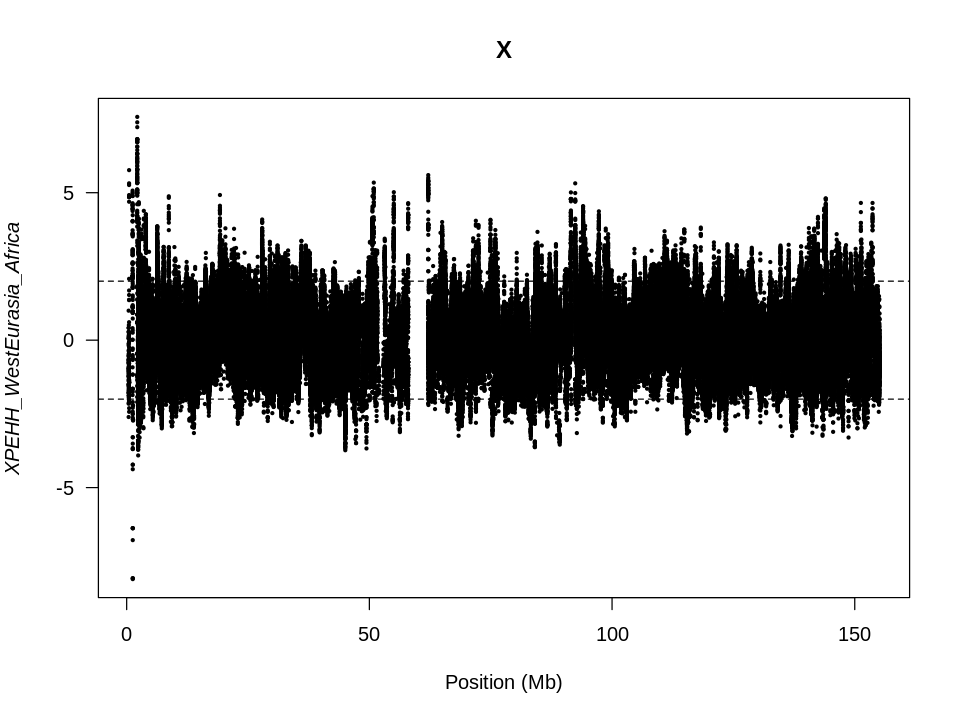

,CHR,POSITION,XPEHH_EastAsia_Africa,LOGPVALUE
,<chr>,<int>,<dbl>,<dbl>
1,X,365712,NA,NA
2,X,400000,NA,NA
3,X,400108,NA,NA
4,X,400132,NA,NA
5,X,400148,NA,NA
6,X,400303,NA,NA


Scan of pop1 contains 411892 markers.
Scan of pop2 contains 411892 markers.
Merged data contains 411892 markers.


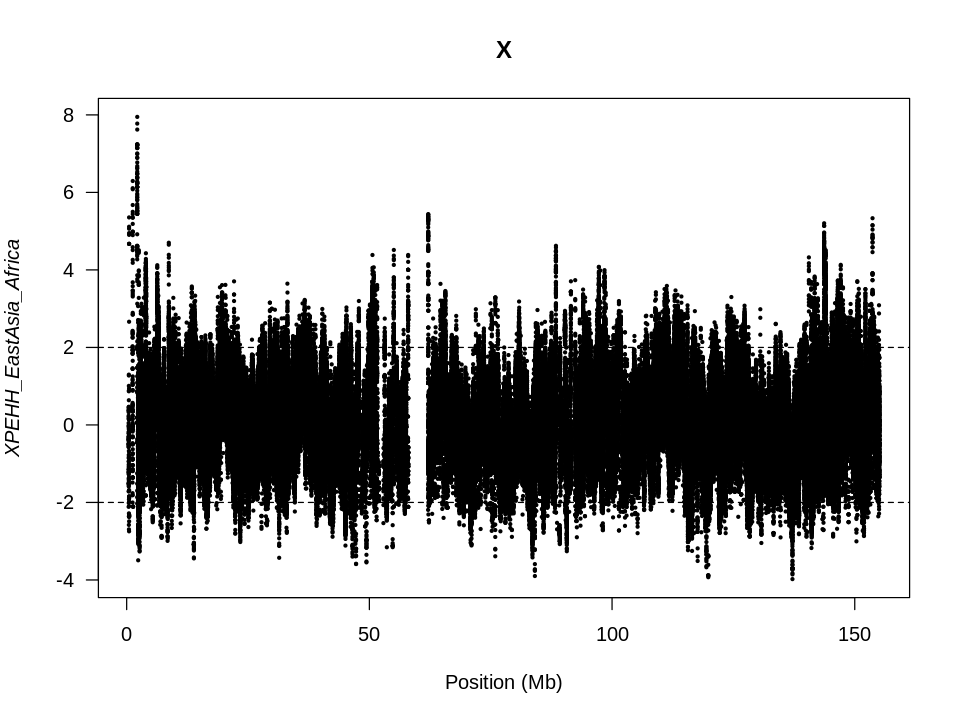

,CHR,POSITION,XPEHH_EastAsia_WestEurasia,LOGPVALUE
,<chr>,<int>,<dbl>,<dbl>
1,X,365712,NA,NA
2,X,400000,NA,NA
3,X,400108,NA,NA
4,X,400132,NA,NA
5,X,400148,NA,NA
6,X,400303,NA,NA


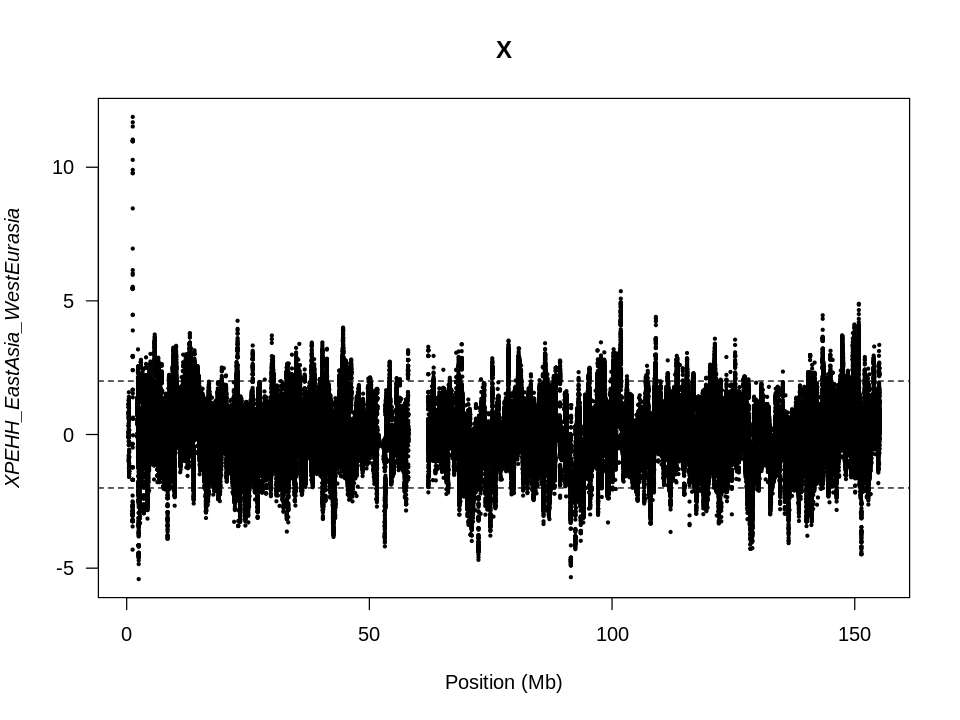

In [3]:
options(repr.plot.width=8, repr.plot.height=6)

XPEHH_WE_AF <- ies2xpehh(res_scan_WE, res_scan_AF, popname1 = "WestEurasia", popname2 = "Africa")
manhattanplot(XPEHH_WE_AF)
head(XPEHH_WE_AF)

XPEHH_EA_AF <- ies2xpehh(res_scan_EA, res_scan_AF, popname1 = "EastAsia", popname2 = "Africa")
manhattanplot(XPEHH_EA_AF)
head(XPEHH_EA_AF)

XPEHH_EA_WE <- ies2xpehh(res_scan_EA, res_scan_WE,  popname1 = "EastAsia", popname2 = "WestEurasia")
manhattanplot(XPEHH_EA_WE)
head(XPEHH_EA_WE)


## Remove NA values

In [4]:
nrow(XPEHH_WE_AF)
sum(is.na(XPEHH_WE_AF$XPEHH_WestEurasia_Africa))
XPEHH_WE_AF  <- XPEHH_WE_AF  %>% filter(!is.na(XPEHH_WestEurasia_Africa)) %>% mutate(XPEHH = XPEHH_WestEurasia_Africa) %>% 
    select(CHR, POSITION, XPEHH, LOGPVALUE)
head(XPEHH_WE_AF)
write_delim(XPEHH_WE_AF, "position_xpehh_WE_AF.csv", delim = "\t", col_names = TRUE)

nrow(XPEHH_EA_AF)
sum(is.na(XPEHH_EA_AF$XPEHH_EastAsia_Africa))
XPEHH_EA_AF  <- XPEHH_EA_AF  %>% filter(!is.na(XPEHH_EastAsia_Africa))  %>% mutate(XPEHH = XPEHH_EastAsia_Africa) %>% 
    select(CHR, POSITION, XPEHH, LOGPVALUE)
head(XPEHH_EA_AF)
write_delim(XPEHH_EA_AF, "position_xpehh_EA_AF.csv", delim = "\t", col_names = TRUE)

nrow(XPEHH_EA_WE)
sum(is.na(XPEHH_EA_WE$XPEHH_EastAsia_WestEurasia))
XPEHH_EA_WE  <- XPEHH_EA_WE %>% filter(!is.na(XPEHH_EastAsia_WestEurasia)) %>% mutate(XPEHH = XPEHH_EastAsia_WestEurasia) %>% 
    select(CHR, POSITION, XPEHH, LOGPVALUE)
head(XPEHH_EA_WE)
write_delim(XPEHH_EA_WE, "position_xpehh_EA_WE.csv", delim = "\t", col_names = TRUE)

[1] 411892

[1] 95

,CHR,POSITION,XPEHH,LOGPVALUE
,<chr>,<int>,<dbl>,<dbl>
23,X,403395,-2.6061405,2.03825203
24,X,403610,-2.1528664,1.50405096
25,X,403873,-1.0440843,0.52805382
26,X,403882,-1.0935236,0.56198964
27,X,403946,-1.1467762,0.59950669
28,X,403978,0.1296617,0.04728789


[1] 411892

[1] 141

,CHR,POSITION,XPEHH,LOGPVALUE
,<chr>,<int>,<dbl>,<dbl>
24,X,403610,-2.1122299,1.4600871
25,X,403873,-0.5232510,0.2212704
26,X,403882,-0.5690792,0.2446570
27,X,403946,-0.5690792,0.2446570
28,X,403978,-0.5232510,0.2212704
29,X,404015,-0.3115925,0.1218516


[1] 411892

[1] 141

,CHR,POSITION,XPEHH,LOGPVALUE
,<chr>,<int>,<dbl>,<dbl>
24,X,403610,-0.1234503,0.04491359
25,X,403873,0.6347161,0.27933342
26,X,403882,0.6355895,0.27980429
27,X,403946,0.7049430,0.31799423
28,X,403978,-0.8939111,0.43019384
29,X,404015,-0.9740673,0.48145562


## Plotting the xpehh distributions

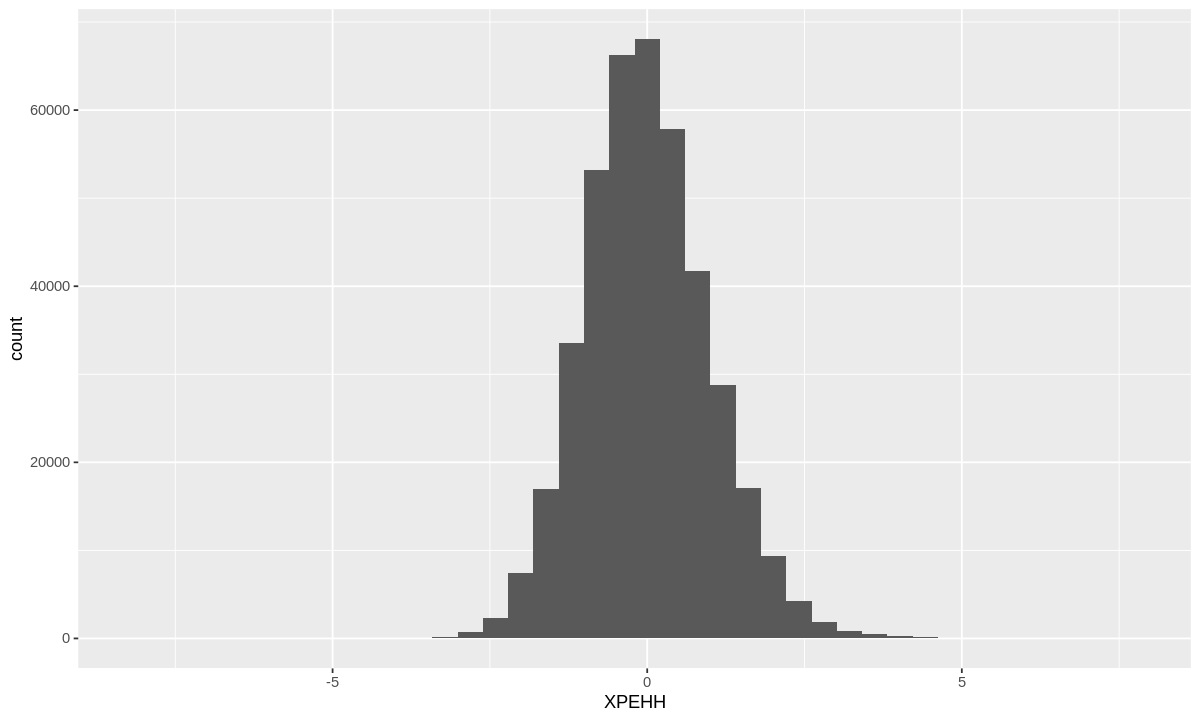

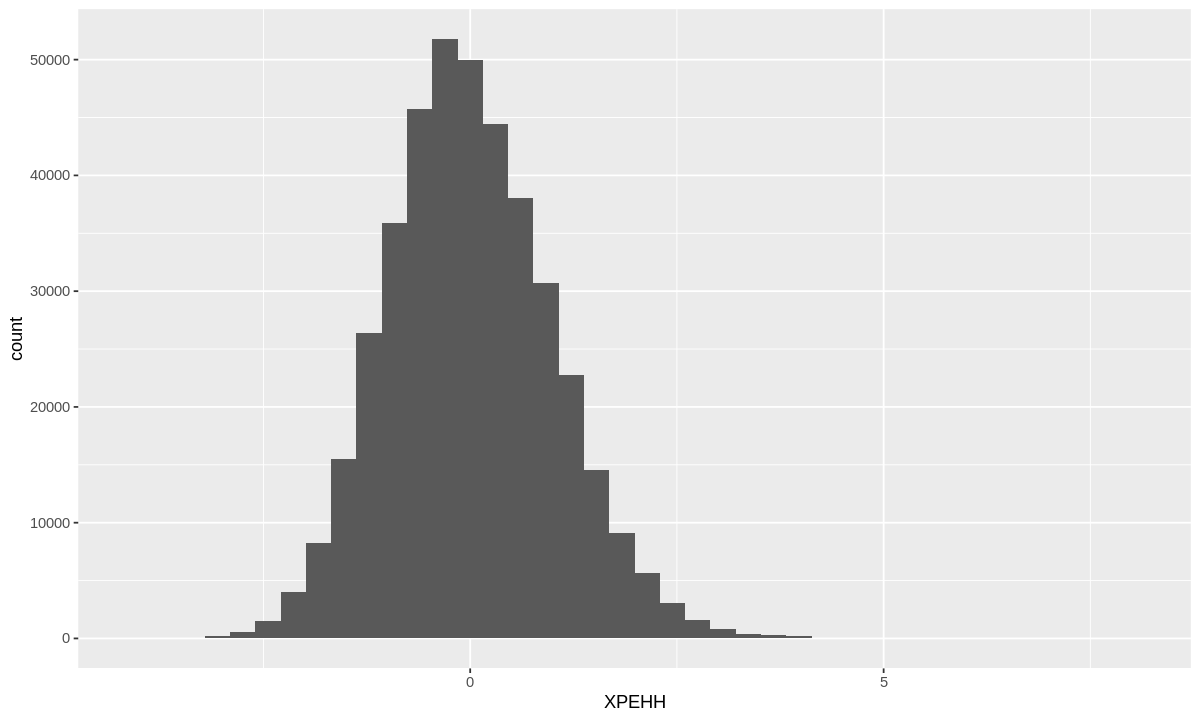

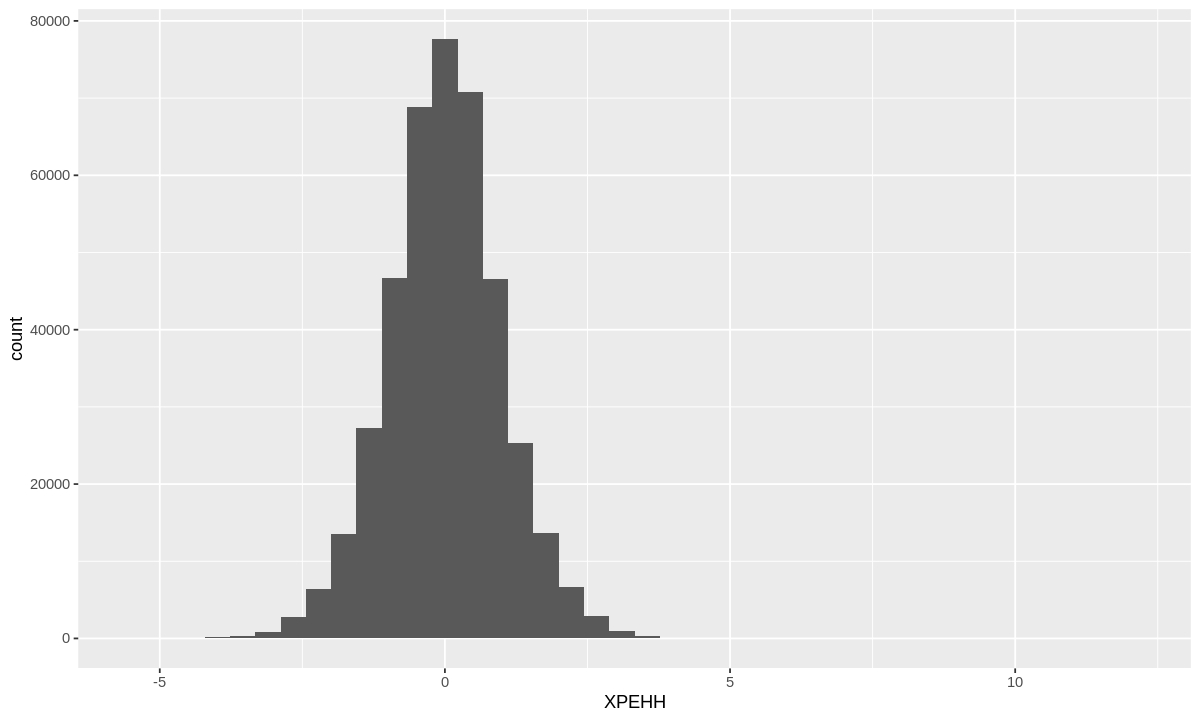

In [5]:
options(repr.plot.width=10, repr.plot.height=6)
ggplot(XPEHH_WE_AF) + geom_histogram(aes(x = XPEHH), bins = 40)
ggplot(XPEHH_EA_AF) + geom_histogram(aes(x = XPEHH), bins = 40)
ggplot(XPEHH_EA_WE) + geom_histogram(aes(x = XPEHH), bins = 40)

## 500 SNPs is approximately 0.12% of the whole data

In [6]:
nrow(XPEHH_WE_AF)
nrow(XPEHH_EA_AF)
nrow(XPEHH_EA_WE)

#411797 - 100%
#x - 5%

x = (411797*0.12)/100
print(x)

#411751 - 100%
#x - 5%

x = (411751*0.12)/100
print(x)

[1] 411797

[1] 411751

[1] 411751

[1] 494.1564
[1] 494.1012


## Find a threshold 

In [7]:
n_signif_WE_AF  <- nrow(XPEHH_WE_AF %>% filter(abs(XPEHH) >= 2))
prop_signif_WE_AF  <- n_signif_WE_AF*100/nrow(XPEHH_WE_AF)
print(prop_signif_WE_AF)

n_signif_EA_AF  <- nrow(XPEHH_EA_AF %>% filter(abs(XPEHH) >= 2))
prop_signif_EA_AF  <- n_signif_EA_AF*100/nrow(XPEHH_EA_AF)
print(prop_signif_EA_AF)

n_signif_EA_WE  <- nrow(XPEHH_EA_WE %>% filter(abs(XPEHH) >= 2))
prop_signif_EA_WE  <- n_signif_EA_WE*100/nrow(XPEHH_EA_WE)
print(prop_signif_EA_WE)


############################

n_signif_WE_AF  <- nrow(XPEHH_WE_AF %>% filter(abs(XPEHH) >= 2.5))
prop_signif_WE_AF  <- n_signif_WE_AF*100/nrow(XPEHH_WE_AF)
print(prop_signif_WE_AF)

n_signif_EA_AF  <- nrow(XPEHH_EA_AF %>% filter(abs(XPEHH) >= 2.5))
prop_signif_EA_AF  <- n_signif_EA_AF*100/nrow(XPEHH_EA_AF)
print(prop_signif_EA_AF)

n_signif_EA_WE  <- nrow(XPEHH_EA_WE %>% filter(abs(XPEHH) >= 2.5))
prop_signif_EA_WE  <- n_signif_EA_WE*100/nrow(XPEHH_EA_WE)
print(prop_signif_EA_WE)


[1] 4.487405
[1] 4.373031
[1] 5.191973
[1] 1.489812
[1] 1.330659
[1] 1.79866


__Threshold 2 results in 500 most significant regions where all 100 SNPs have xpehh value > 2 so number of significant snps is 100, therefore I will use a higher threshold__

### Average / count the number of xpehh values > 2.5 in windows of 100 SNPs

In [8]:
# average the iHS values in 100 SNP windows

xpehh_in_sliding_windows <- function(xpehh_data, window_size = 100){
    chr = NULL
    first_snp_pos = NULL
    last_snp_pos = NULL
    avg_xpehh = NULL
    prop_signif = NULL
    print("here")
    ws_ = window_size - 1

    for (i in 1:(nrow(xpehh_data) - ws_)){
        chr[i] <- xpehh_data$CHR[i]
        first_snp_pos[i] <- xpehh_data$POSITION[i]
        last_snp_pos[i] <- xpehh_data$POSITION[i + ws_]
        subset <- xpehh_data %>% filter(between(POSITION, first_snp_pos[i], last_snp_pos[i]))
        prop_signif[i]  <- nrow(subset  %>% filter(abs(XPEHH) >= 2.5))
        avg_xpehh[i] <- mean(subset$XPEHH)                              
    }

    xpehh  <- tibble(chr =  chr,
                   first_snp_pos = first_snp_pos, 
                   last_snp_pos = last_snp_pos, 
                   prop_signif = prop_signif,
                   avg_xpehh = avg_xpehh)
    return(xpehh)
}

In [9]:
# Africa
print("Europe - Africa")
windows_xpehh_WE_AF  <- xpehh_in_sliding_windows(XPEHH_WE_AF)
write_delim(windows_xpehh_WE_AF, "windows_xpehh_WE_AF.csv", delim = "\t", col_names = TRUE)

# WestEurasia
print("EastAsia - Africa")
windows_xpehh_EA_AF  <- xpehh_in_sliding_windows(XPEHH_EA_AF)
write_delim(windows_xpehh_EA_AF, "windows_xpehh_EA_AF.csv", delim = "\t", col_names = TRUE)

#EastAsia
print("EastAsia - Europe")
windows_xpehh_EA_WE <- xpehh_in_sliding_windows(XPEHH_EA_WE)
write_delim(windows_xpehh_EA_WE, "windows_xpehh_EA_WE.csv", delim = "\t", col_names = TRUE)

[1] "Europe - Africa"
[1] "here"
[1] "EastAsia - Africa"
[1] "here"
[1] "EastAsia - Europe"
[1] "here"


## Analyze significant XPEHH values, WestEurasia - Africa

[1] 250

[1] 250

[1] 500

chr,first_snp_pos,last_snp_pos,prop_signif,avg_xpehh
<chr>,<int>,<int>,<int>,<dbl>
X,144019885,144035456,100,3.769778
X,50609614,50631323,100,3.757005
X,50610238,50631375,100,3.756843
X,50610312,50631377,100,3.754749
X,50609240,50631156,100,3.752968
X,50617658,50639529,100,3.752866


[1] 411698

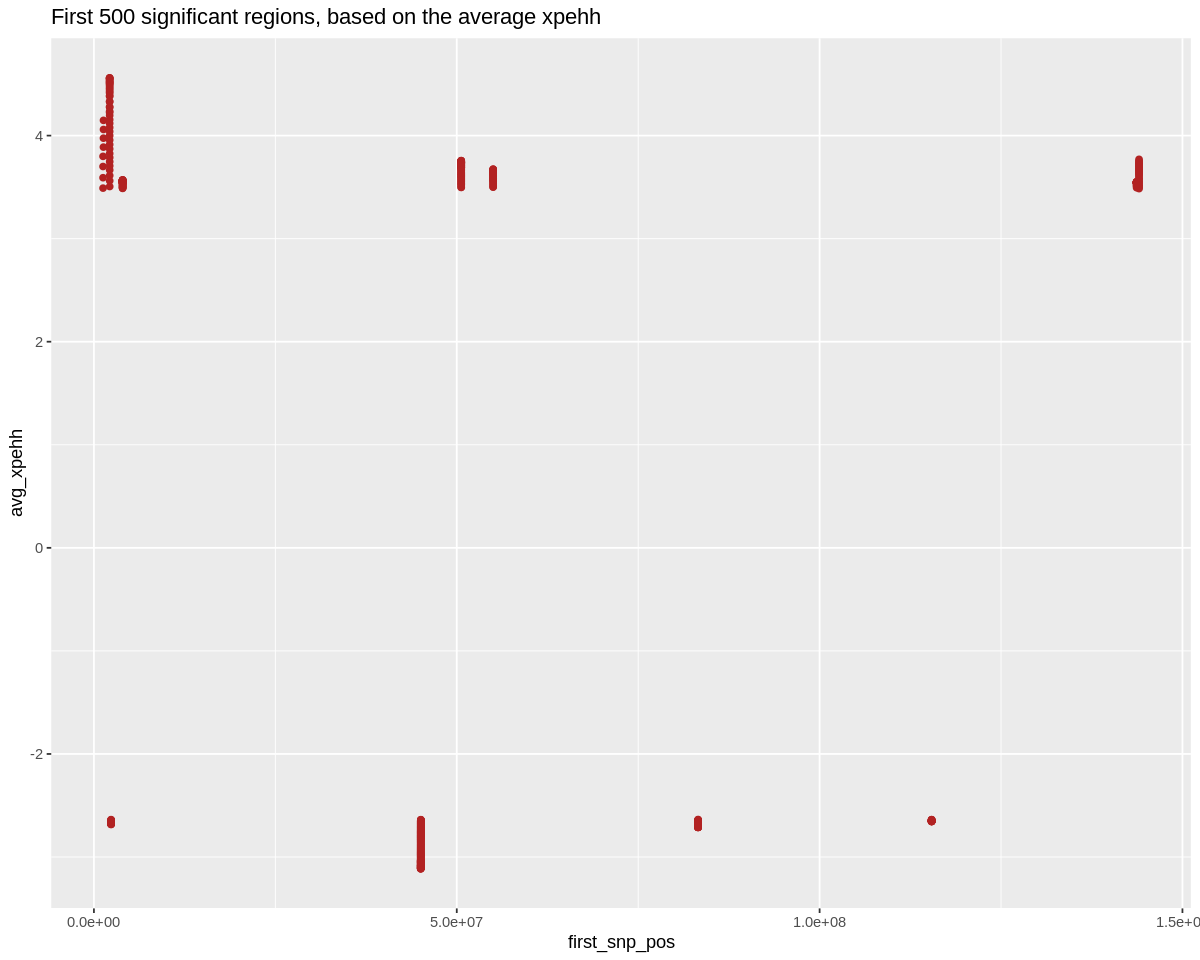

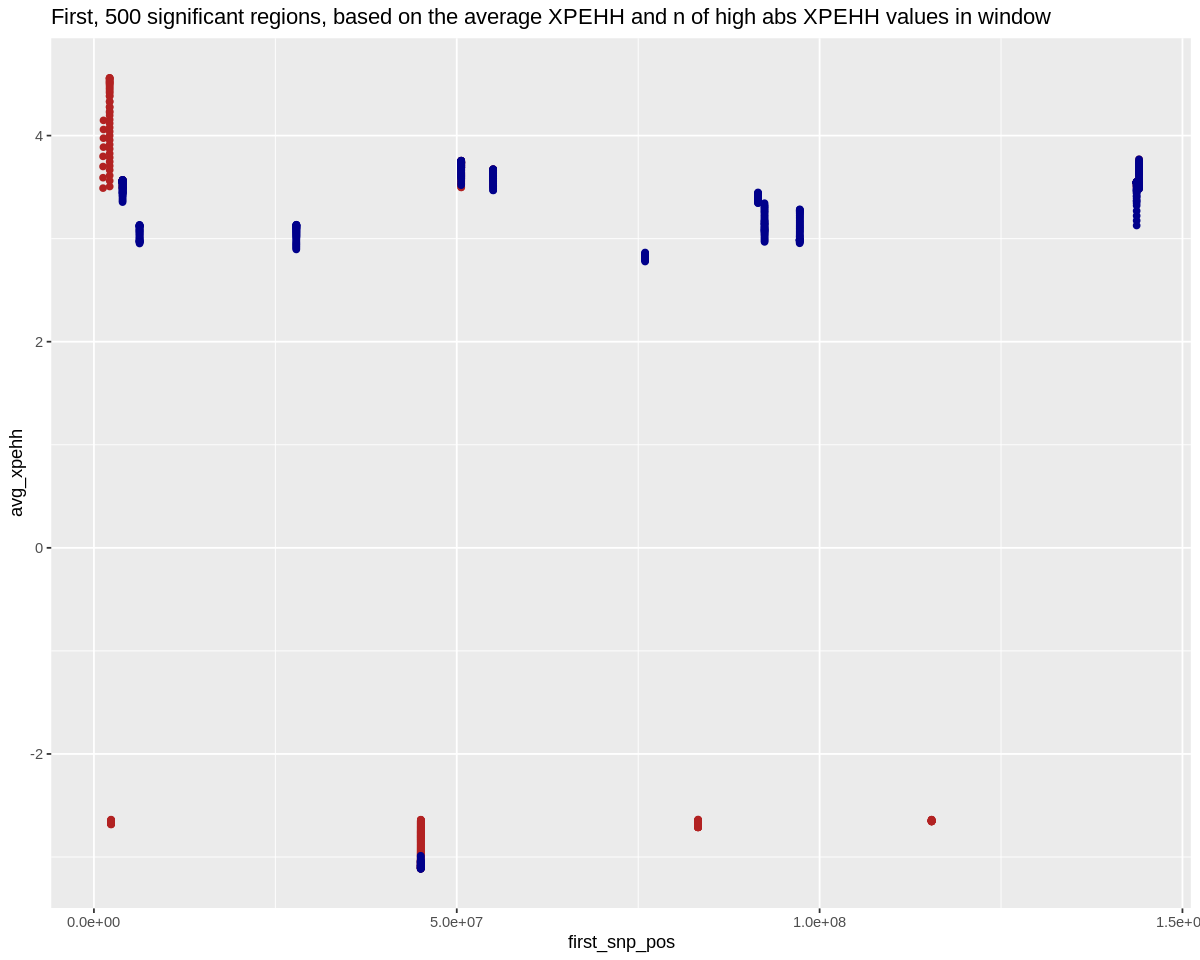

In [11]:
options(repr.plot.width=10, repr.plot.height=8)

windows_xpehh_WE_AF <- windows_xpehh_WE_AF %>% arrange(desc(avg_xpehh))

mean_xpehh_WE_AF_high  <- windows_xpehh_WE_AF[1:250, ]  
nrow(mean_xpehh_WE_AF_high)

mean_xpehh_WE_AF_low   <- windows_xpehh_WE_AF[(nrow(windows_xpehh_WE_AF)-249):nrow(windows_xpehh_WE_AF), ]
nrow(mean_xpehh_WE_AF_low )
mean_xpehh_WE_AF_sign  <- bind_rows(mean_xpehh_WE_AF_high, mean_xpehh_WE_AF_low)
nrow(mean_xpehh_WE_AF_sign)


#write bed file for annotating genes
mean_xpehh_WE_AF_sign <- mean_xpehh_WE_AF_sign  %>% 
                                mutate(chr = rep("chrX", nrow(mean_xpehh_WE_AF_sign)))  %>%  
                                select(chr, first_snp_pos, last_snp_pos, prop_signif, avg_xpehh)
write_delim(mean_xpehh_WE_AF_sign, "mean_xpehh_WE_AF_sign_500.bed", delim = "\t", col_names = FALSE)

#find the 500 most significant regions based on the number of absolute xpehh values in the window that are higher than 2
windows_xpehh_WE_AF <- windows_xpehh_WE_AF  %>% arrange(desc(prop_signif))
head(windows_xpehh_WE_AF)
nrow(windows_xpehh_WE_AF)
prop_signif_xpehh_WE_AF_high <- windows_xpehh_WE_AF[1:500, ]  

#write bed file for annotating genes
prop_signif_xpehh_WE_AF_high <- prop_signif_xpehh_WE_AF_high  %>% 
                                mutate(chr = rep("chrX", nrow(prop_signif_xpehh_WE_AF_high)))  %>%  
                                select(chr, first_snp_pos, last_snp_pos, prop_signif, avg_xpehh)
write_delim(prop_signif_xpehh_WE_AF_high, "prop_signif_xpehh_WE_AF_high_500.bed", delim = "\t", col_names = FALSE)


# plotting the significant regions in both cases
ggplot() + geom_point(data = mean_xpehh_WE_AF_sign, aes(x = first_snp_pos, y = avg_xpehh), color = "firebrick") + 
            ggtitle("First 500 significant regions, based on the average xpehh")

ggplot() + geom_point(data = mean_xpehh_WE_AF_sign, aes(x = first_snp_pos, y = avg_xpehh), color = "firebrick") + 
        geom_point(data = prop_signif_xpehh_WE_AF_high, aes(x = first_snp_pos, y = avg_xpehh), color = "darkblue") + 
        ggtitle("First, 500 significant regions, based on the average XPEHH and n of high abs XPEHH values in window")



## Annotating genes in significant XPEHH regions, WestEurasia - Africa

[1] 636

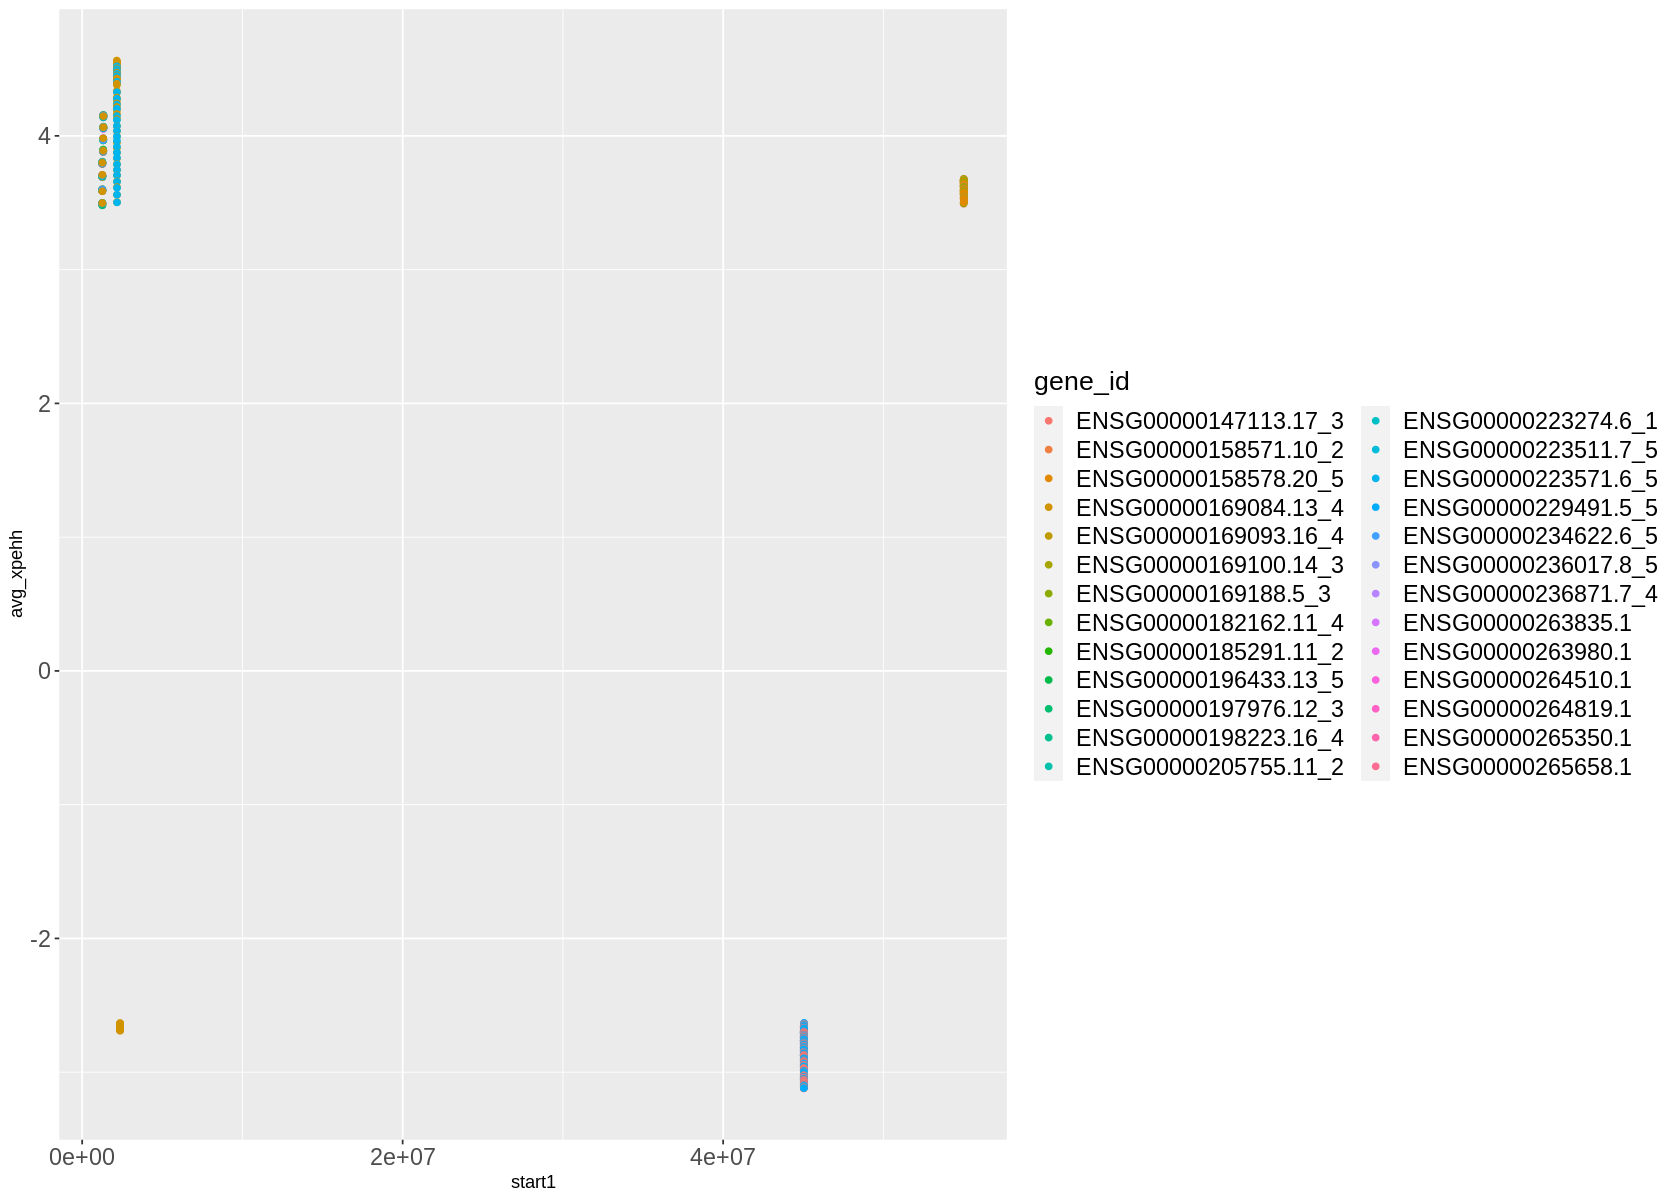

In [14]:
# Based on the mean xpehh 

# explain potential adaptive explanations
options(repr.plot.width=14, repr.plot.height=10)

mean_xpehh_WE_AF_sign_500_genes <- read.table("mean_xpehh_WE_AF_sign_500_genes.bed", header = FALSE, sep = '\t')
colnames(mean_xpehh_WE_AF_sign_500_genes)  <- c("chr1", "start1", "end1", "prop_signif", "avg_xpehh", "chr2", "start2", "end2", "gene_id", "overlap")
mean_xpehh_WE_AF_sign_500_genes  <- mean_xpehh_WE_AF_sign_500_genes %>% filter(overlap != 0)  %>% 
    distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)

ggplot() + geom_jitter(data = mean_xpehh_WE_AF_sign_500_genes, aes(x = start1, y = avg_xpehh, color = gene_id), width = 0.001, height = 0.01) +
    theme(
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14), 
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14)
        )

gene_names_WE_AF_mean_xpehh  <- (unique(mean_xpehh_WE_AF_sign_500_genes[c("gene_id")]))

write_delim(gene_names_WE_AF_mean_xpehh, "gene_names_WE_AF_mean_xpehh.csv", delim = "\t", col_names = TRUE)

[1] 301


[1] 310

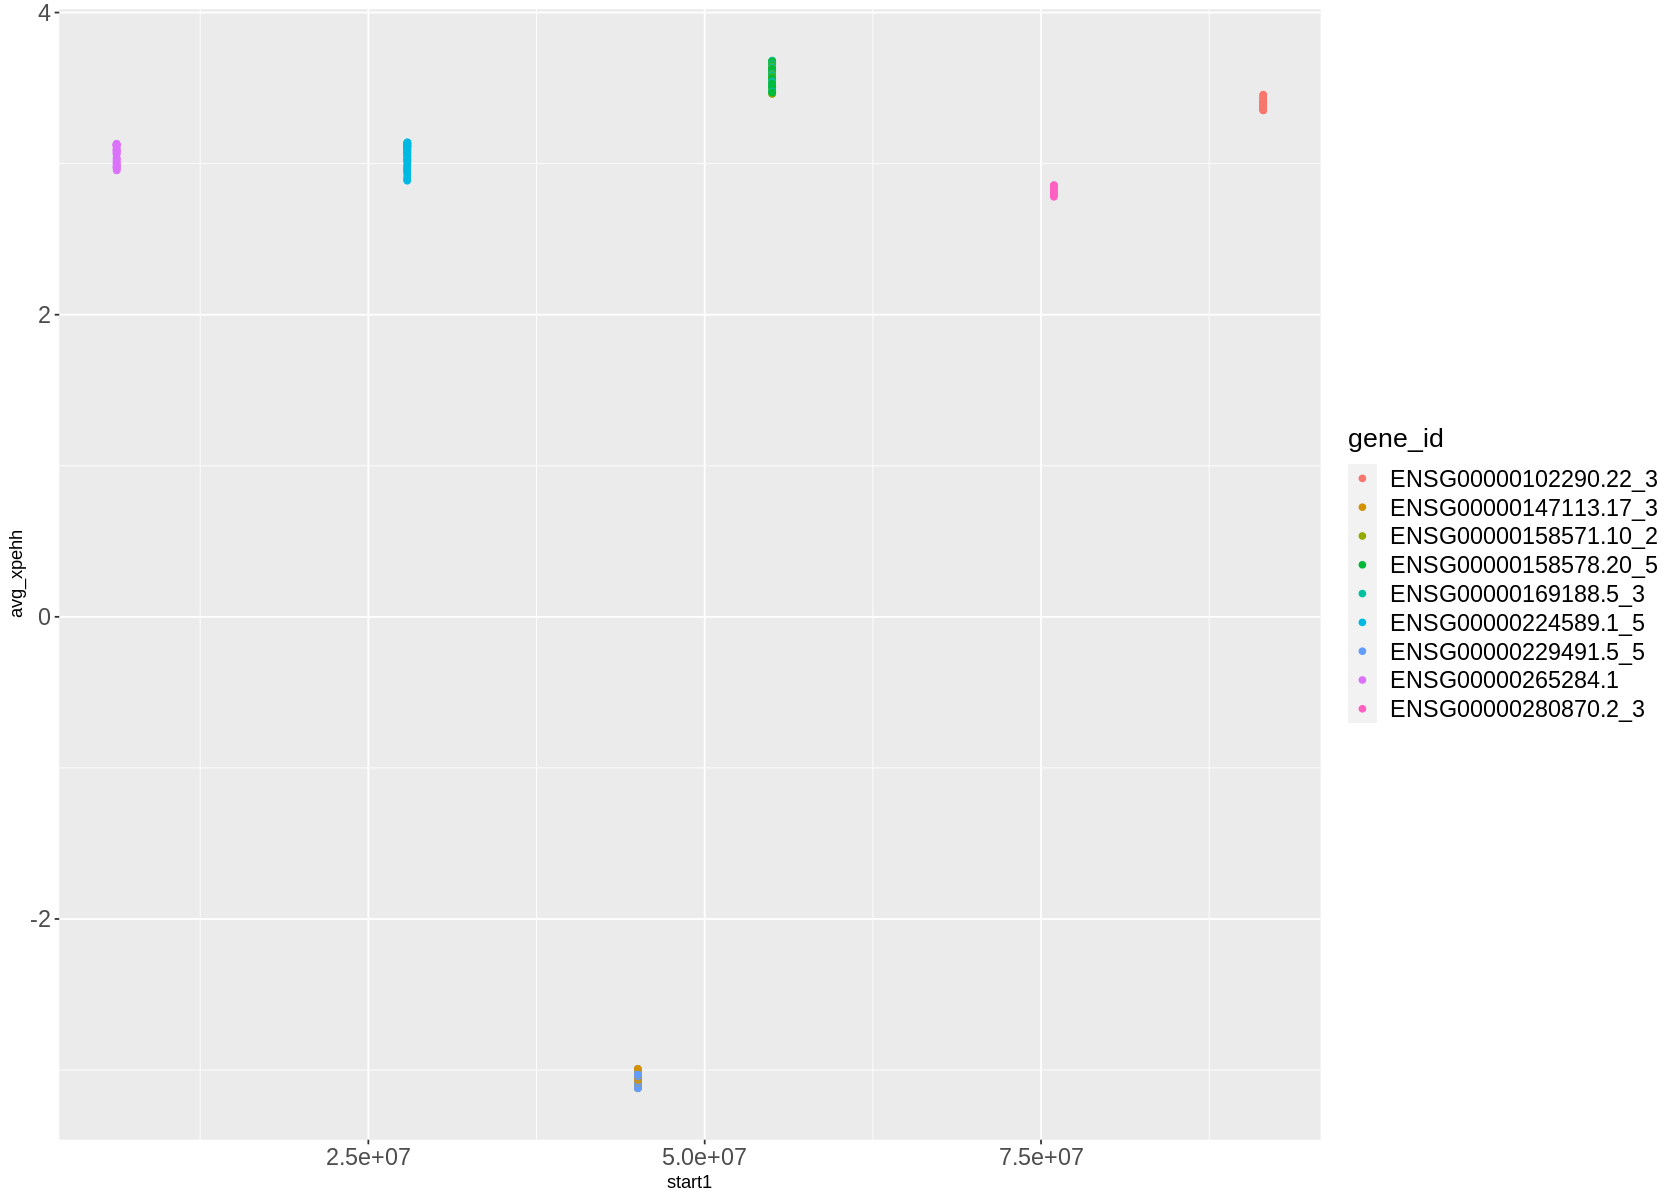

In [16]:
# Based on the number of significant xpehh values in window

# explain potential adaptive explanations
options(repr.plot.width=14, repr.plot.height=10)

prop_signif_xpehh_WE_AF_high_500_genes <- read.table("prop_signif_xpehh_WE_AF_high_500_genes.bed", header = FALSE, sep = '\t')
colnames(prop_signif_xpehh_WE_AF_high_500_genes)  <- c("chr1", "start1", "end1", "prop_signif", "avg_xpehh", "chr2", "start2", "end2", "gene_id", "overlap")

print(nrow(prop_signif_xpehh_WE_AF_high_500_genes %>% filter(overlap == 0)))

prop_signif_xpehh_WE_AF_high_500_genes  <- prop_signif_xpehh_WE_AF_high_500_genes %>% filter(overlap != 0) %>% 
    distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)


ggplot() + geom_jitter(data = prop_signif_xpehh_WE_AF_high_500_genes, aes(x = start1, y = avg_xpehh, color = gene_id), width = 0.001, height = 0.01) +
    theme(
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14), 
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14)
        )

gene_names_WE_AF_n_signif_xpehh  <- (unique(prop_signif_xpehh_WE_AF_high_500_genes[c("gene_id")]))
write_delim(gene_names_WE_AF_n_signif_xpehh , "gene_names_WE_AF_n_signif_xpehh.csv", delim = "\t", col_names = TRUE)

In [10]:
# comparing overlap between genes
intersect(gene_names_WE_AF_mean_xpehh, gene_names_WE_AF_n_signif_xpehh)

gene_id
<chr>
ENSG00000158571.10_2
ENSG00000169188.5_3
ENSG00000158578.20_5
ENSG00000147113.17_3
ENSG00000229491.5_5


## Get genomic coordinates and genes

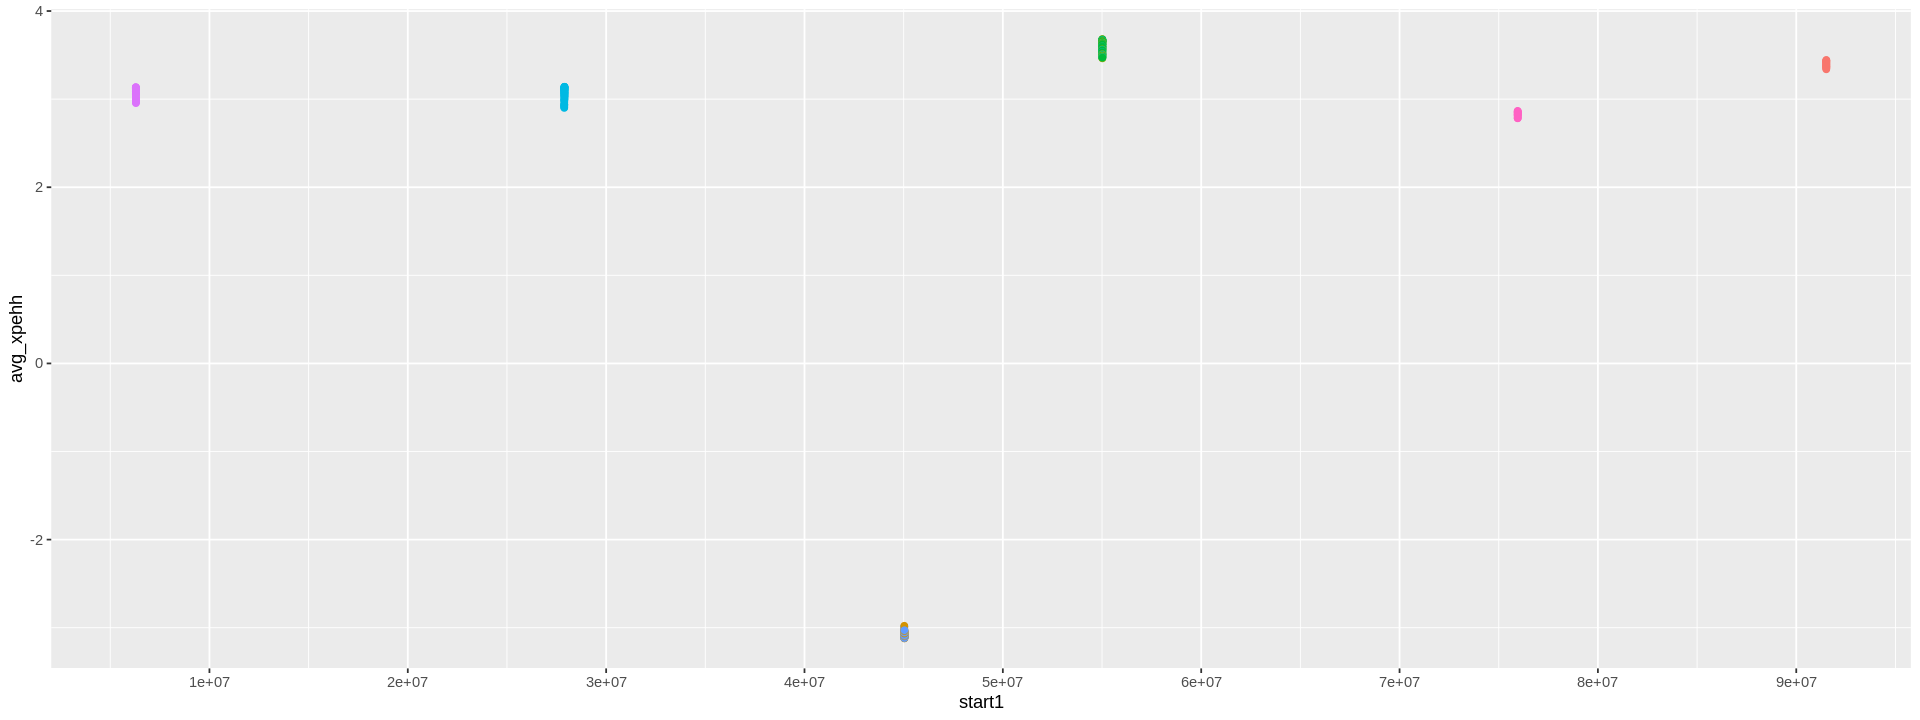

In [33]:
options(repr.plot.width=16, repr.plot.height=6)
ggplot() + 
    geom_jitter(data = prop_signif_xpehh_WE_AF_high_500_genes, aes(x = start1, y = avg_xpehh, color = gene_id), width = 0.001, height = 0.01, show.legend = FALSE) +
    scale_x_continuous(breaks = seq(0, 1.5e+08, 1e+07))

In [35]:
subset  <- prop_signif_xpehh_WE_AF_high_500_genes  %>% filter(between(start1, 0, 1e+07))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_xpehh_WE_AF_high_500_genes  %>% filter(between(start1, 2e+07, 3e+07))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_xpehh_WE_AF_high_500_genes  %>% filter(between(start1, 4e+07, 5e+07))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_xpehh_WE_AF_high_500_genes  %>% filter(between(start1, 5e+07, 6e+07))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_xpehh_WE_AF_high_500_genes  %>% filter(between(start1, 6e+07, 8e+07))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_xpehh_WE_AF_high_500_genes  %>% filter(between(start1, 8e+07, 1e+08))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

[1] 6286402 6315709


,gene_id
,<chr>
1,ENSG00000265284.1


[1] 27887646 27927552


,gene_id
,<chr>
1,ENSG00000224589.1_5


[1] 45031536 45055744


,gene_id
,<chr>
1,ENSG00000229491.5_5
2,ENSG00000147113.17_3


[1] 55010782 55048230


,gene_id
,<chr>
1,ENSG00000158571.10_2
2,ENSG00000169188.5_3
3,ENSG00000158578.20_5


[1] 75954529 75970509


,gene_id
,<chr>
1,ENSG00000280870.2_3


[1] 91513029 91534578


,gene_id
,<chr>
1,ENSG00000102290.22_3


## Analyze significant XPEHH values, EastAsia - Africa

[1] 250

[1] 250

[1] 500

chr,first_snp_pos,last_snp_pos,prop_signif,avg_xpehh
<chr>,<int>,<int>,<int>,<dbl>
X,143686783,143702412,100,4.299387
X,143686362,143702255,100,4.287092
X,143686263,143702085,100,4.276472
X,143686203,143702013,100,4.265296
X,143685947,143701996,100,4.259006
X,143685841,143701982,100,4.248711


[1] 411652

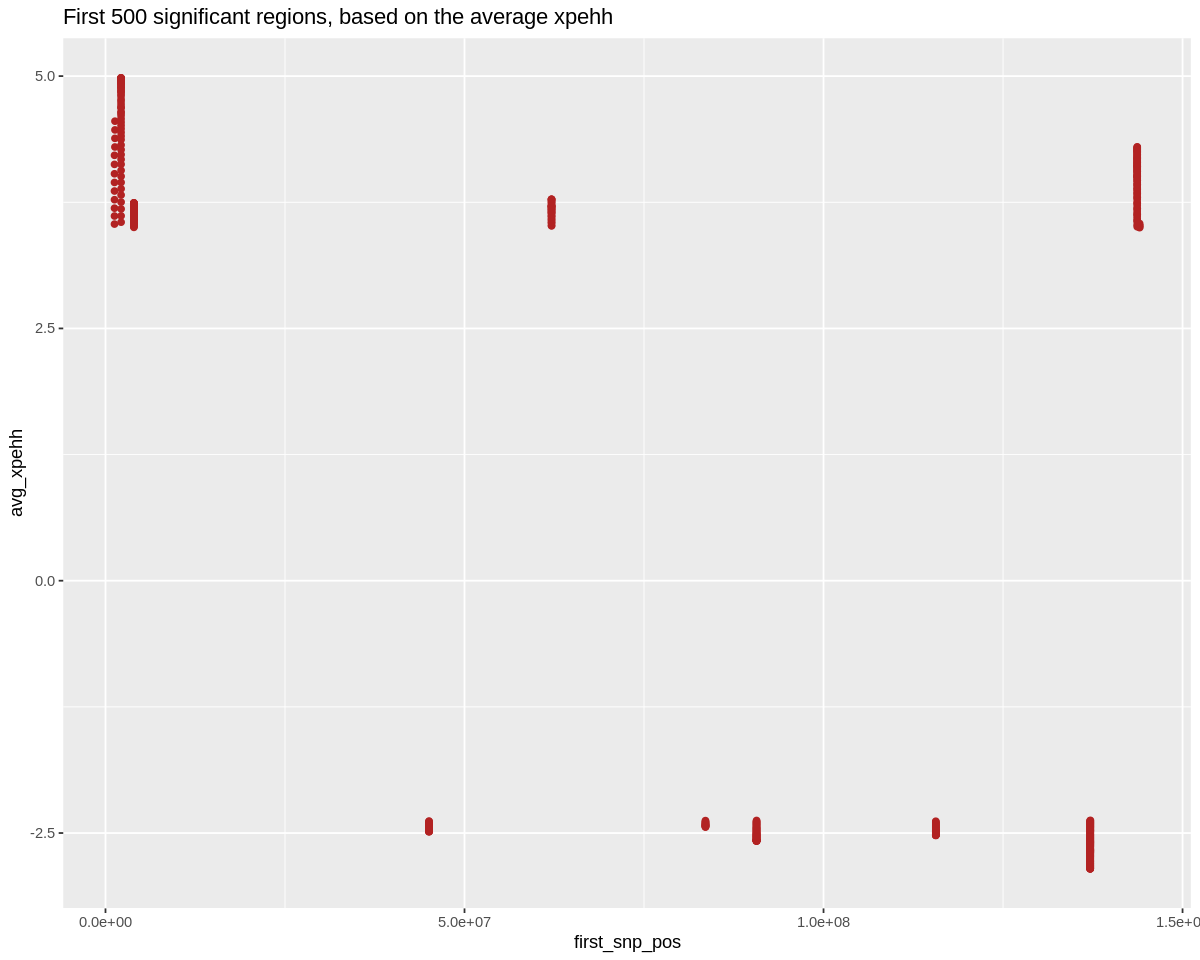

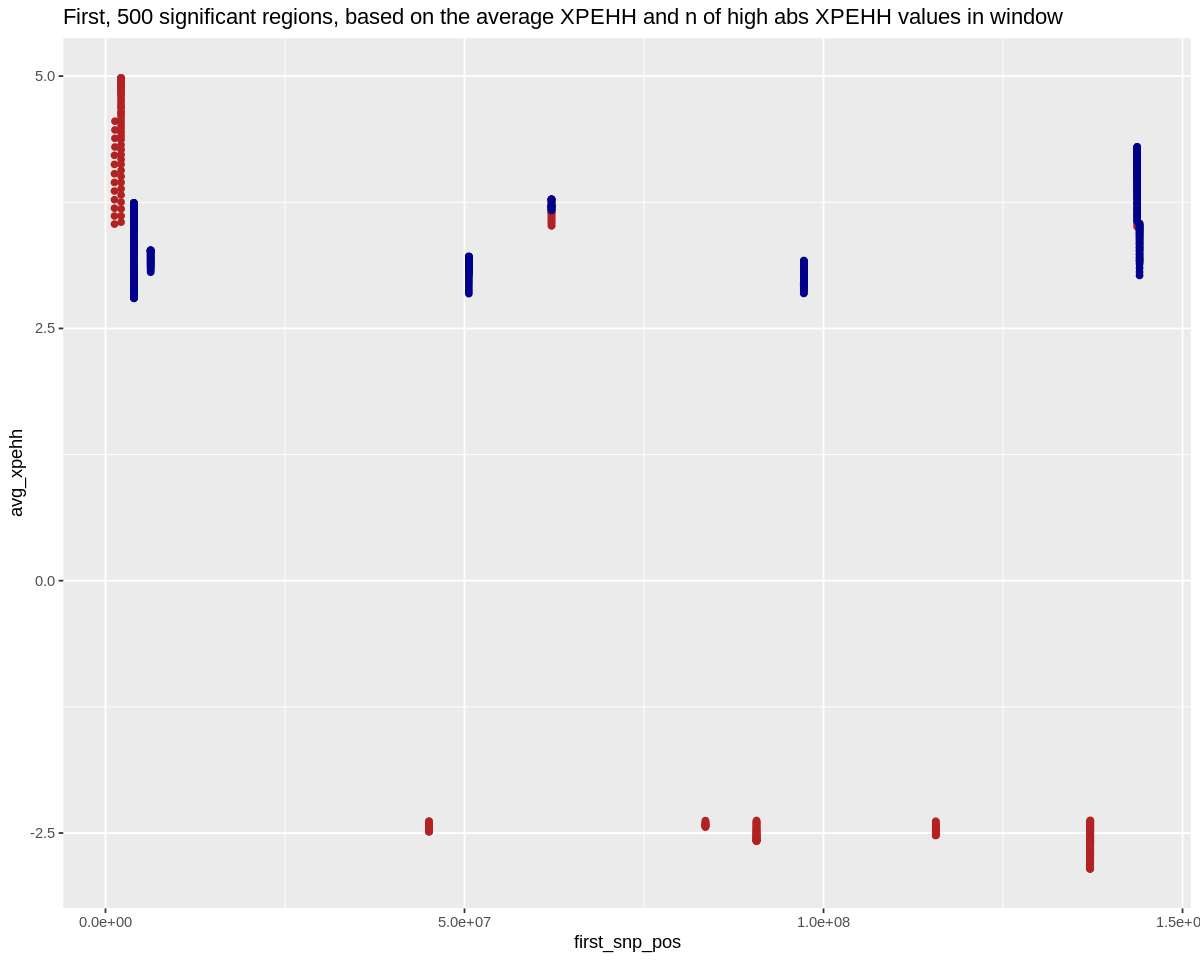

In [12]:
options(repr.plot.width=10, repr.plot.height=8)

windows_xpehh_EA_AF <- windows_xpehh_EA_AF %>% arrange(desc(avg_xpehh))

mean_xpehh_EA_AF_high  <- windows_xpehh_EA_AF[1:250, ]  
nrow(mean_xpehh_EA_AF_high)

mean_xpehh_EA_AF_low   <- windows_xpehh_EA_AF[(nrow(windows_xpehh_EA_AF)-249):nrow(windows_xpehh_EA_AF), ]
nrow(mean_xpehh_EA_AF_low)
mean_xpehh_EA_AF_sign  <- bind_rows(mean_xpehh_EA_AF_high, mean_xpehh_EA_AF_low)
nrow(mean_xpehh_EA_AF_sign)

#write bed file for annotating genes
mean_xpehh_EA_AF_sign <- mean_xpehh_EA_AF_sign  %>% 
                                mutate(chr = rep("chrX", nrow(mean_xpehh_EA_AF_sign)))  %>%  
                                select(chr, first_snp_pos, last_snp_pos, prop_signif, avg_xpehh)
write_delim(mean_xpehh_EA_AF_sign, "mean_xpehh_EA_AF_sign_500.bed", delim = "\t", col_names = FALSE)

#find the 500 most significant regions based on the number of absolute xpehh values in the window that are higher than 2
windows_xpehh_EA_AF <- windows_xpehh_EA_AF  %>% arrange(desc(prop_signif))
head(windows_xpehh_EA_AF)
nrow(windows_xpehh_EA_AF)
prop_signif_xpehh_EA_AF_high <- windows_xpehh_EA_AF[1:500, ]  

#write bed file for annotating genes
prop_signif_xpehh_EA_AF_high <- prop_signif_xpehh_EA_AF_high  %>% 
                                mutate(chr = rep("chrX", nrow(prop_signif_xpehh_EA_AF_high)))  %>%  
                                select(chr, first_snp_pos, last_snp_pos, prop_signif, avg_xpehh)
write_delim(prop_signif_xpehh_EA_AF_high, "prop_signif_xpehh_EA_AF_high_500.bed", delim = "\t", col_names = FALSE)


# plotting the significant regions in both cases
ggplot() + geom_point(data = mean_xpehh_EA_AF_sign, aes(x = first_snp_pos, y = avg_xpehh), color = "firebrick") + 
            ggtitle("First 500 significant regions, based on the average xpehh")

ggplot() + geom_point(data = mean_xpehh_EA_AF_sign, aes(x = first_snp_pos, y = avg_xpehh), color = "firebrick") + 
        geom_point(data = prop_signif_xpehh_EA_AF_high, aes(x = first_snp_pos, y = avg_xpehh), color = "darkblue") + 
        ggtitle("First, 500 significant regions, based on the average XPEHH and n of high abs XPEHH values in window")



## Annotating genes in significant XPEHH regions, EastAsia - Africa

[1] 567

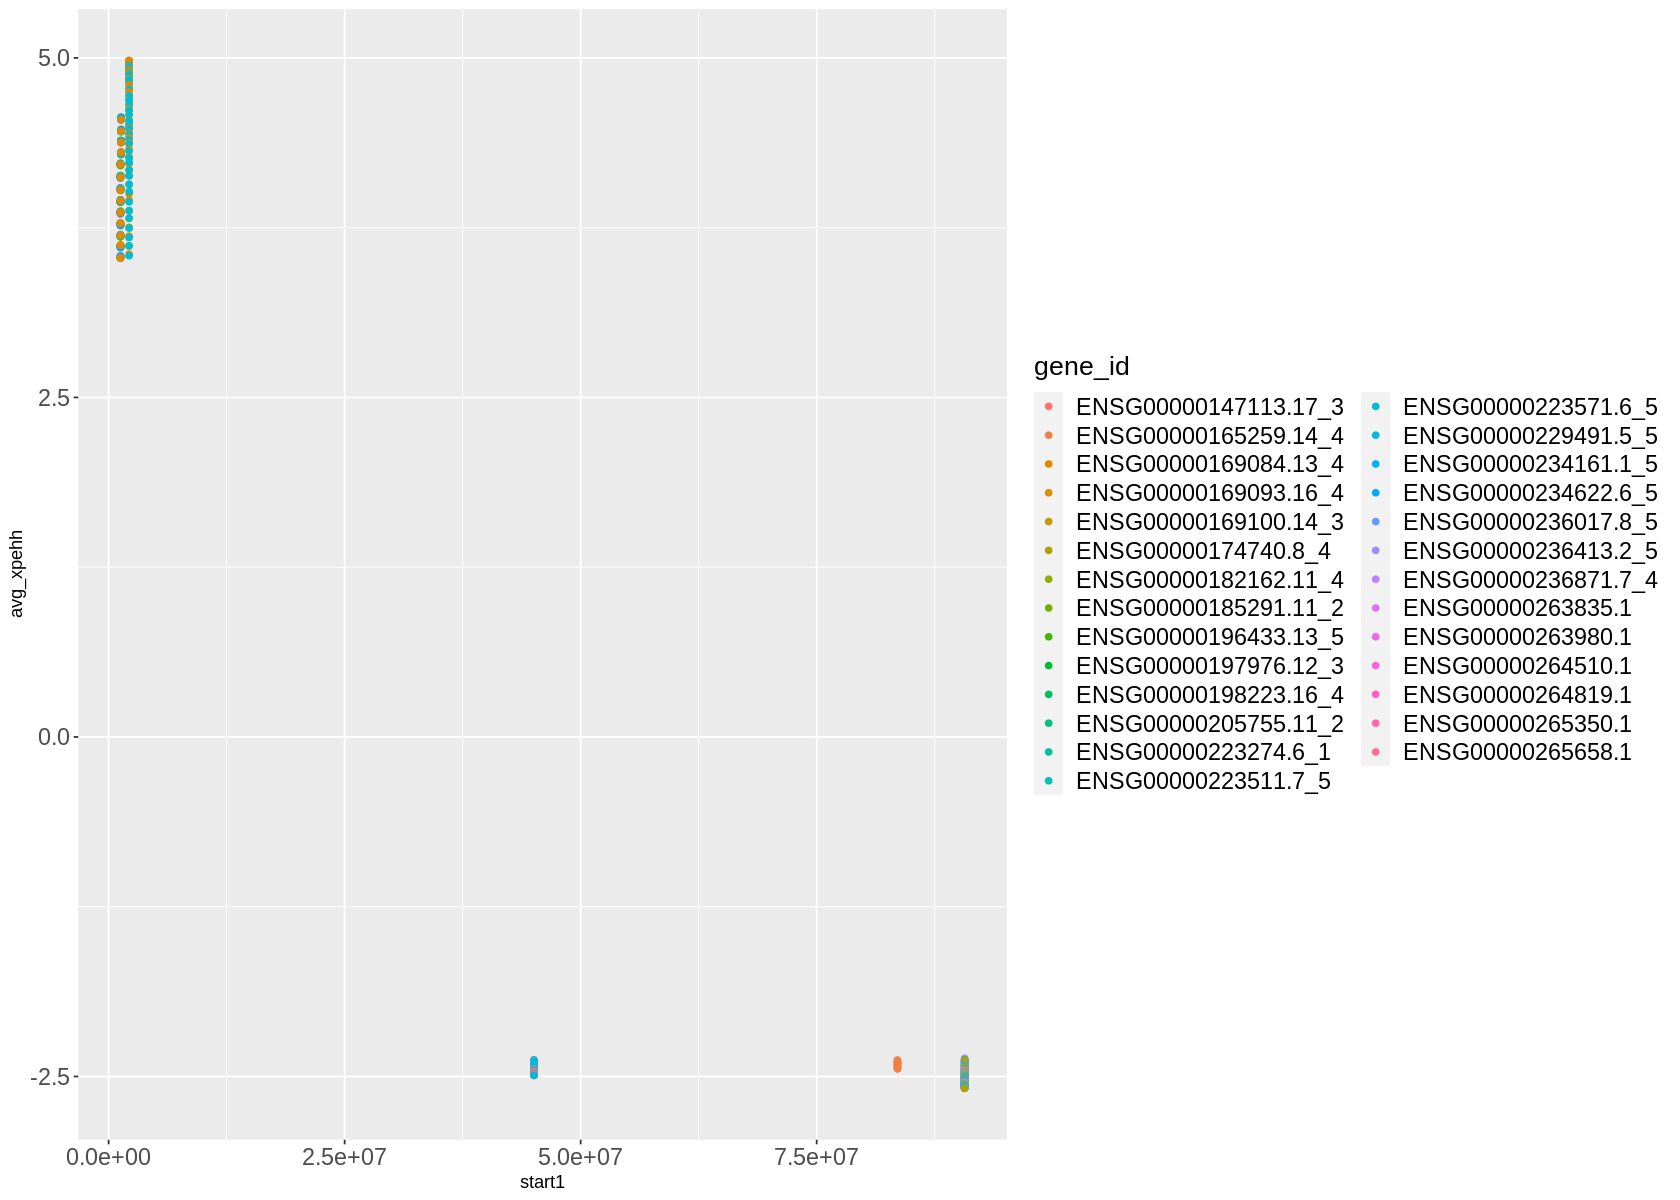

In [20]:
# Based on the mean xpehh 

# explain potential adaptive explanations
options(repr.plot.width=14, repr.plot.height=10)

mean_xpehh_EA_AF_sign_500_genes <- read.table("mean_xpehh_EA_AF_sign_500_genes.bed", header = FALSE, sep = '\t')
colnames(mean_xpehh_EA_AF_sign_500_genes)  <- c("chr1", "start1", "end1", "prop_signif", "avg_xpehh", "chr2", "start2", "end2", "gene_id", "overlap")
mean_xpehh_EA_AF_sign_500_genes  <- mean_xpehh_EA_AF_sign_500_genes %>% filter(overlap != 0)  %>% 
    distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)

ggplot() + geom_jitter(data = mean_xpehh_EA_AF_sign_500_genes, aes(x = start1, y = avg_xpehh, color = gene_id), width = 0.001, height = 0.01) +
    theme(
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14), 
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14)
        )

gene_names_EA_AF_mean_xpehh  <- (unique(mean_xpehh_EA_AF_sign_500_genes[c("gene_id")]))


write_delim(gene_names_EA_AF_mean_xpehh, "gene_names_EA_AF_mean_xpehh.csv", delim = "\t", col_names = TRUE)

[1] 465


[1] 35

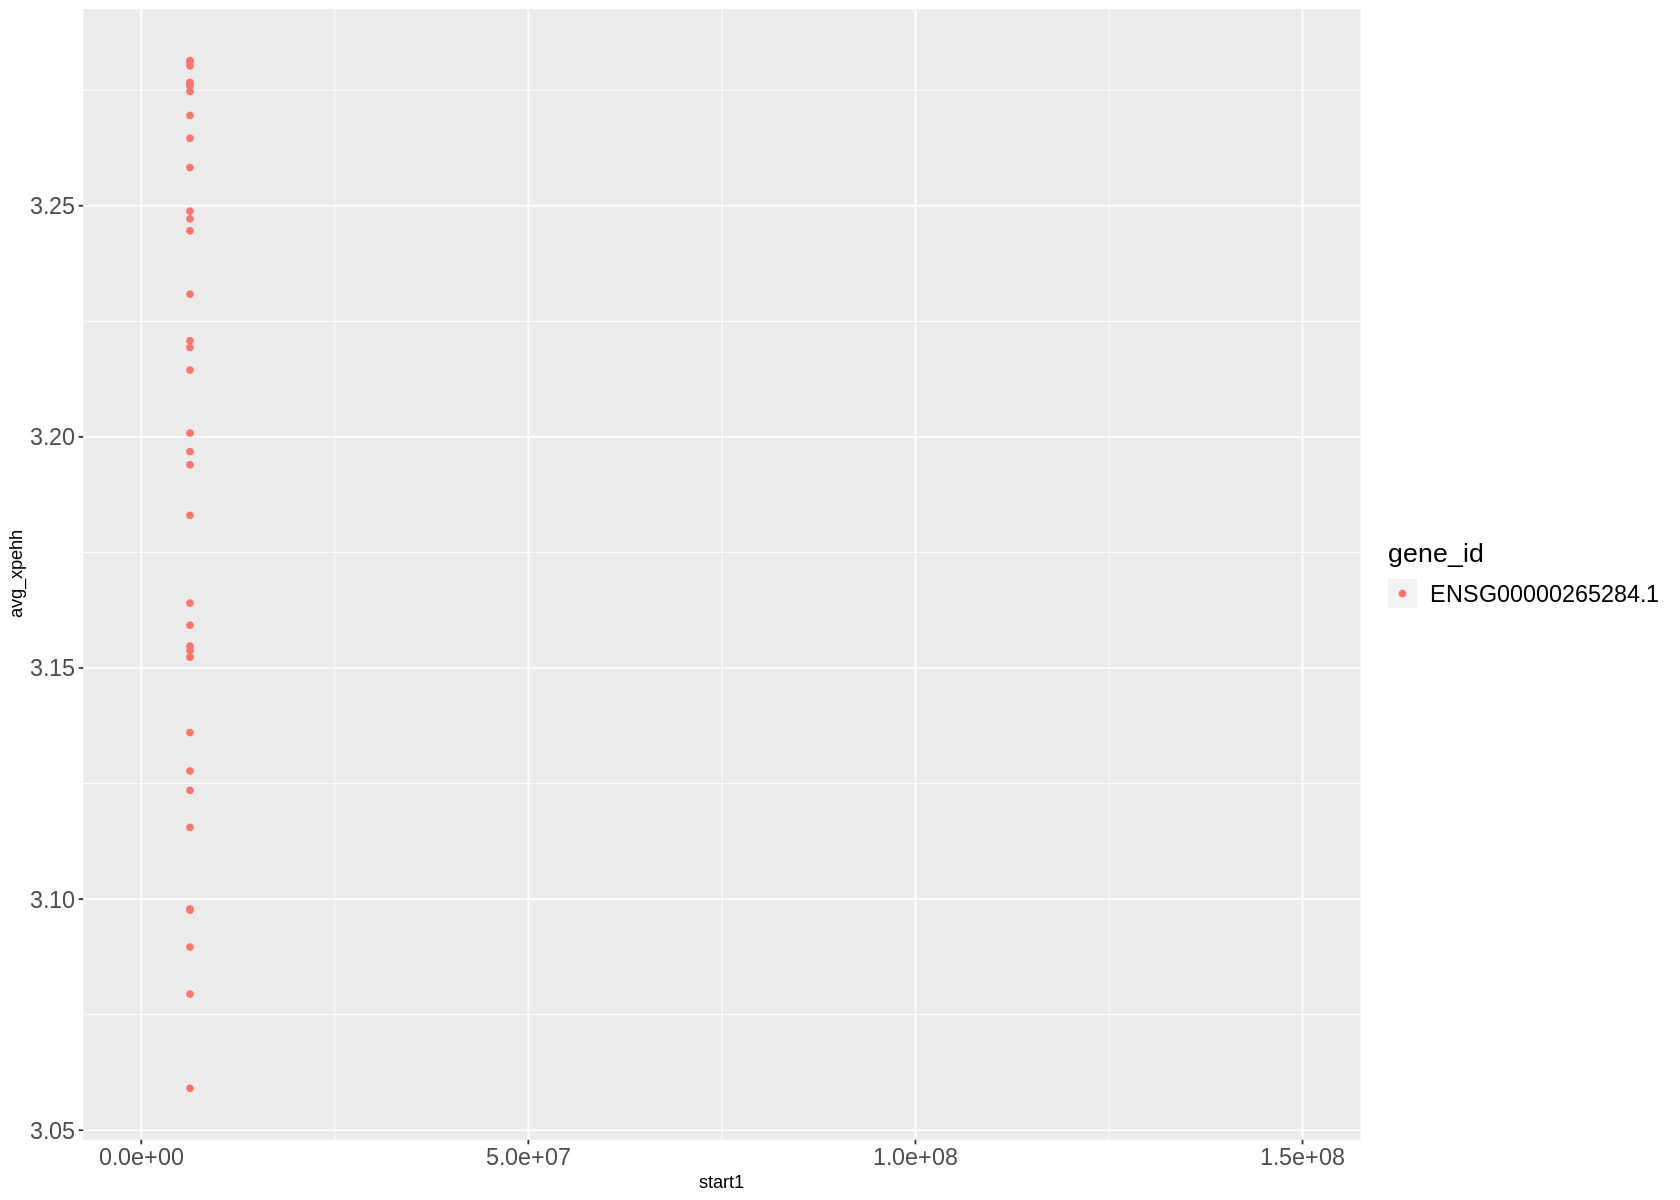

In [17]:
# Based on the number of significant xpehh values in window

# explain potential adaptive explanations
options(repr.plot.width=14, repr.plot.height=10)

prop_signif_xpehh_EA_AF_high_500_genes <- read.table("prop_signif_xpehh_EA_AF_high_500_genes.bed", header = FALSE, sep = '\t')
colnames(prop_signif_xpehh_EA_AF_high_500_genes)  <- c("chr1", "start1", "end1", "prop_signif", "avg_xpehh", "chr2", "start2", "end2", "gene_id", "overlap")

print(nrow(prop_signif_xpehh_EA_AF_high_500_genes %>% filter(overlap == 0)))

prop_signif_xpehh_EA_AF_high_500_genes  <- prop_signif_xpehh_EA_AF_high_500_genes %>% filter(overlap != 0)  %>% 
    distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)

ggplot() + geom_jitter(data = prop_signif_xpehh_EA_AF_high_500_genes, aes(x = start1, y = avg_xpehh, color = gene_id), width = 0.001, height = 0.01) +
    theme(
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14), 
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14)
        ) + xlim(0, 1.5e+08)

gene_names_EA_AF_n_signif_xpehh  <- (unique(prop_signif_xpehh_EA_AF_high_500_genes[c("gene_id")]))

write_delim(gene_names_EA_AF_n_signif_xpehh, "gene_names_EA_AF_n_signif_xpehh.csv", delim = "\t", col_names = TRUE)

In [16]:
# comparing overlap between genes
intersect(gene_names_EA_AF_mean_xpehh, gene_names_EA_AF_n_signif_xpehh)

gene_id
<chr>


## Get genes and genomic coordinates

In [31]:
subset  <- prop_signif_xpehh_EA_AF_high_500_genes  %>% filter(between(start1, 0, 5e+07))
print(get_coords(subset))
(unique(subset[c("gene_id")]))


[1] 6285355 6314024


,gene_id
,<chr>
1,ENSG00000265284.1


## Analyze significant XPEHH values, EastAsia - WestEurasia

[1] 250

[1] 250

[1] 500

chr,first_snp_pos,last_snp_pos,prop_signif,avg_xpehh
<chr>,<int>,<int>,<int>,<dbl>
X,101790866,101820206,100,4.117787
X,101791531,101820358,100,4.116744
X,101790097,101820203,100,4.116469
X,101789496,101820198,100,4.115042
X,101792065,101820794,100,4.111827
X,101789108,101820176,100,4.111394


[1] 411652

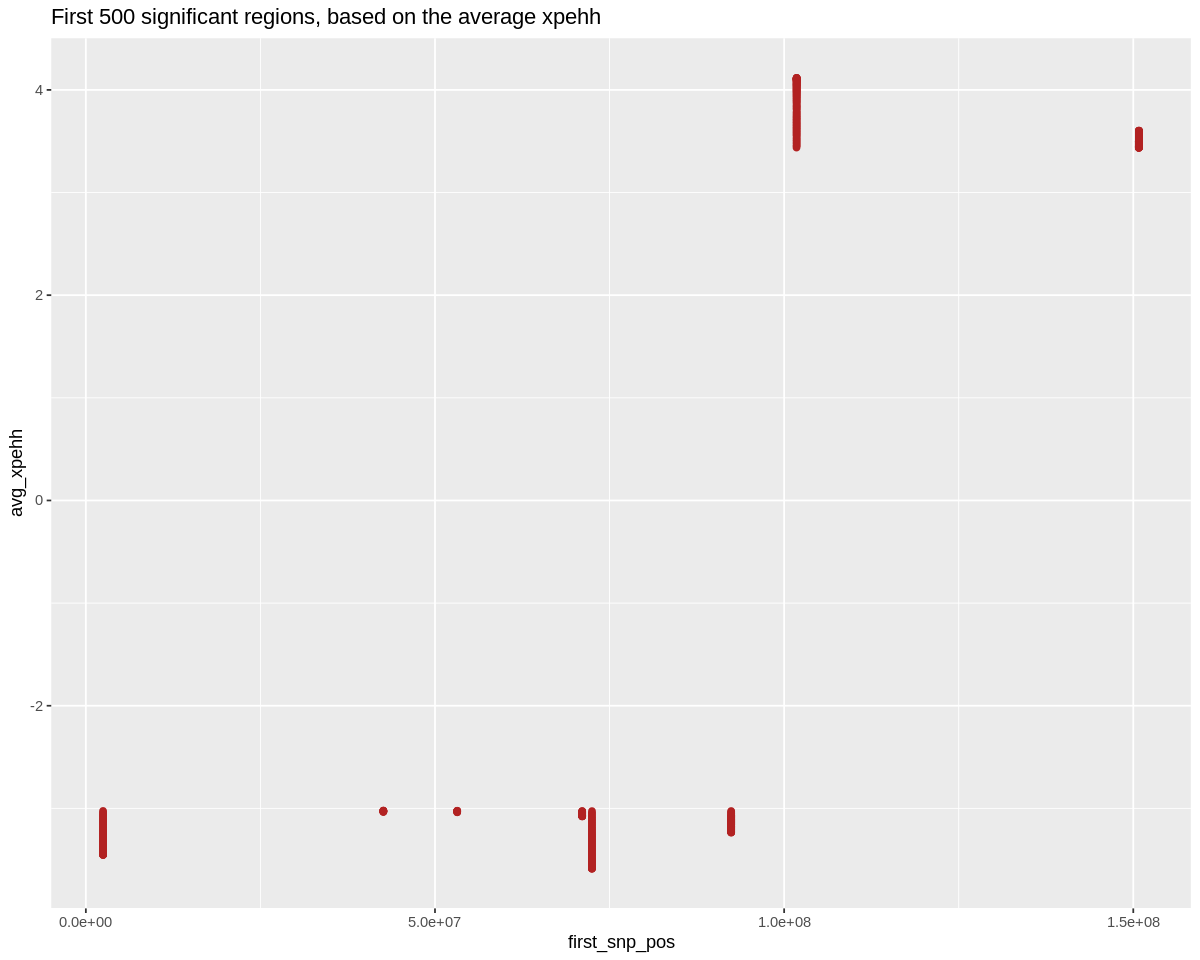

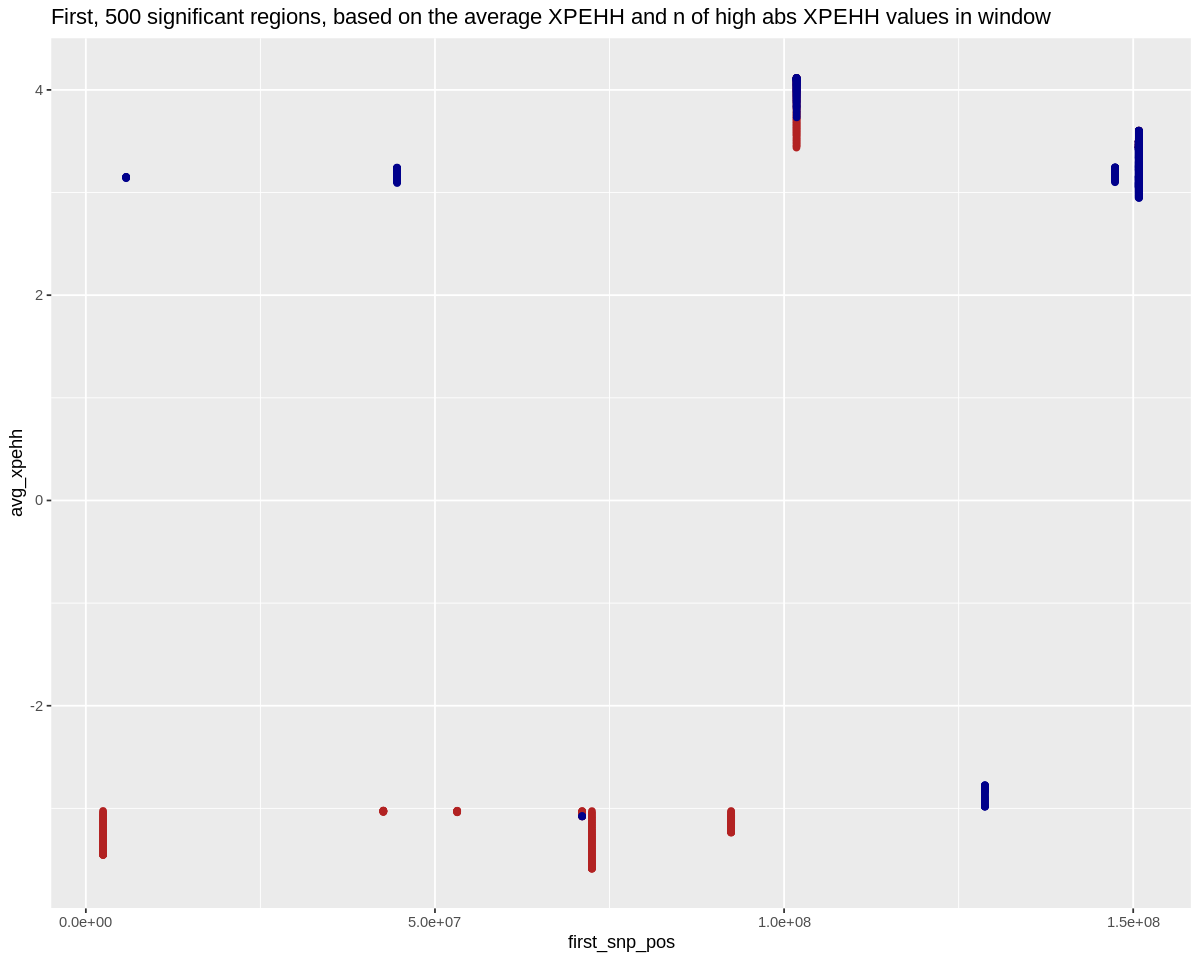

In [13]:
options(repr.plot.width=10, repr.plot.height=8)

windows_xpehh_EA_WE <- windows_xpehh_EA_WE %>% arrange(desc(avg_xpehh))

mean_xpehh_EA_WE_high  <- windows_xpehh_EA_WE[1:250, ]  
nrow(mean_xpehh_EA_WE_high)

mean_xpehh_EA_WE_low   <- windows_xpehh_EA_WE[(nrow(windows_xpehh_EA_WE)-249):nrow(windows_xpehh_EA_WE), ]
nrow(mean_xpehh_EA_WE_low)
mean_xpehh_EA_WE_sign  <- bind_rows(mean_xpehh_EA_WE_high, mean_xpehh_EA_WE_low)
nrow(mean_xpehh_EA_WE_sign)

#write bed file for annotating genes
mean_xpehh_EA_WE_sign <- mean_xpehh_EA_WE_sign  %>% 
                                mutate(chr = rep("chrX", nrow(mean_xpehh_EA_WE_sign)))  %>%  
                                select(chr, first_snp_pos, last_snp_pos, prop_signif, avg_xpehh)
write_delim(mean_xpehh_EA_WE_sign, "mean_xpehh_EA_WE_sign_500.bed", delim = "\t", col_names = FALSE)

#find the 500 most significant regions based on the number of absolute xpehh values in the window that are higher than 2
windows_xpehh_EA_WE <- windows_xpehh_EA_WE  %>% arrange(desc(prop_signif))
head(windows_xpehh_EA_WE)
nrow(windows_xpehh_EA_WE)
prop_signif_xpehh_EA_WE_high <- windows_xpehh_EA_WE[1:500, ]  

#write bed file for annotating genes
prop_signif_xpehh_EA_WE_high <- prop_signif_xpehh_EA_WE_high  %>% 
                                mutate(chr = rep("chrX", nrow(prop_signif_xpehh_EA_WE_high)))  %>%  
                                select(chr, first_snp_pos, last_snp_pos, prop_signif, avg_xpehh)
write_delim(prop_signif_xpehh_EA_WE_high, "prop_signif_xpehh_EA_WE_high_500.bed", delim = "\t", col_names = FALSE)


# plotting the significant regions in both cases
ggplot() + geom_point(data = mean_xpehh_EA_WE_sign, aes(x = first_snp_pos, y = avg_xpehh), color = "firebrick") + 
            ggtitle("First 500 significant regions, based on the average xpehh")

ggplot() + geom_point(data = mean_xpehh_EA_WE_sign, aes(x = first_snp_pos, y = avg_xpehh), color = "firebrick") + 
        geom_point(data = prop_signif_xpehh_EA_WE_high, aes(x = first_snp_pos, y = avg_xpehh), color = "darkblue") + 
        ggtitle("First, 500 significant regions, based on the average XPEHH and n of high abs XPEHH values in window")



## Annotating genes in significant XPEHH regions, EastAsia - WestEurasia

[1] 600

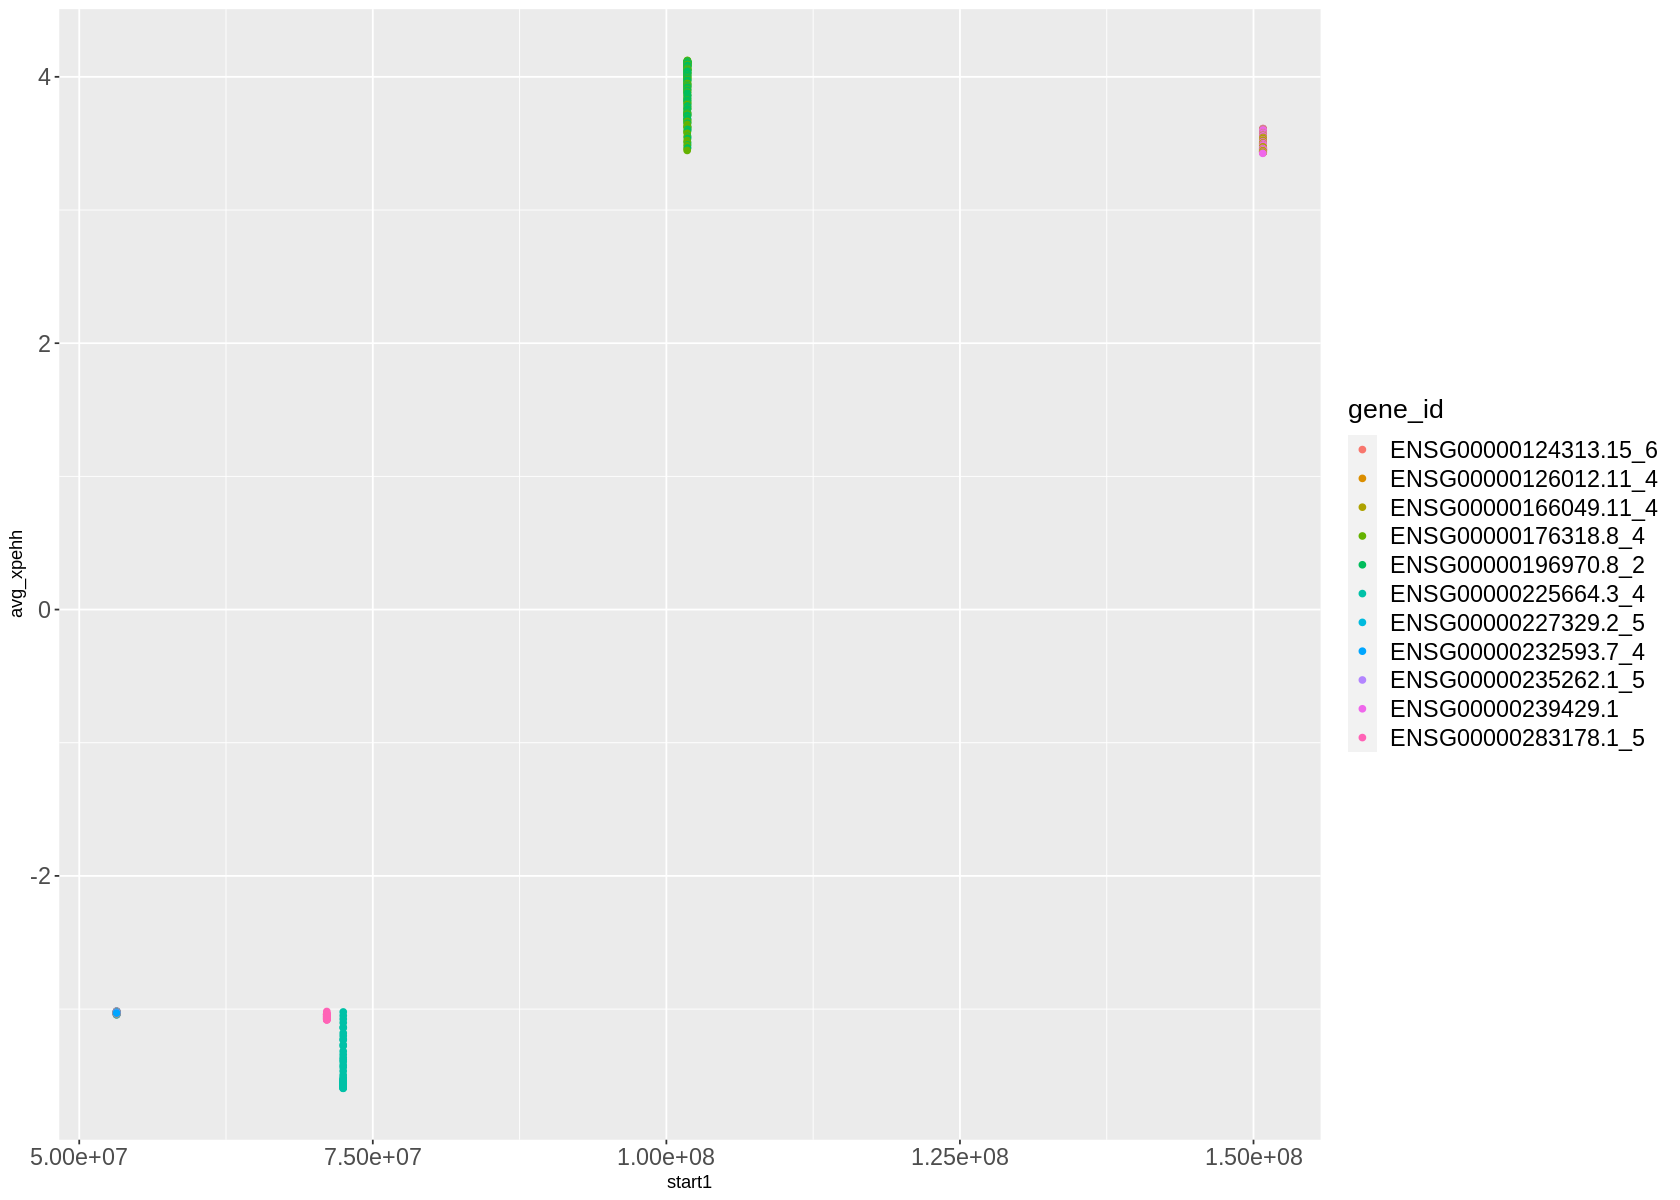

In [17]:
# Based on the mean xpehh 
options(repr.plot.width=14, repr.plot.height=10)

mean_xpehh_EA_WE_sign_500_genes <- read.table("mean_xpehh_EA_WE_sign_500_genes.bed", header = FALSE, sep = '\t')
colnames(mean_xpehh_EA_WE_sign_500_genes)  <- c("chr1", "start1", "end1", "prop_signif", "avg_xpehh", "chr2", "start2", "end2", "gene_id", "overlap")
mean_xpehh_EA_WE_sign_500_genes  <- mean_xpehh_EA_WE_sign_500_genes %>% filter(overlap != 0)  %>% distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)
nrow(mean_xpehh_EA_WE_sign_500_genes)

ggplot() + geom_jitter(data = mean_xpehh_EA_WE_sign_500_genes, aes(x = start1, y = avg_xpehh, color = gene_id), width = 0.001, height = 0.01) +
    theme(
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14), 
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14)
        )

gene_names_EA_WE_mean_xpehh  <- (unique(mean_xpehh_EA_WE_sign_500_genes[c("gene_id")]))
write_delim(gene_names_EA_WE_mean_xpehh, "gene_names_EA_WE_mean_xpehh.csv", delim = "\t", col_names = TRUE)

[1] 71


[1] 775

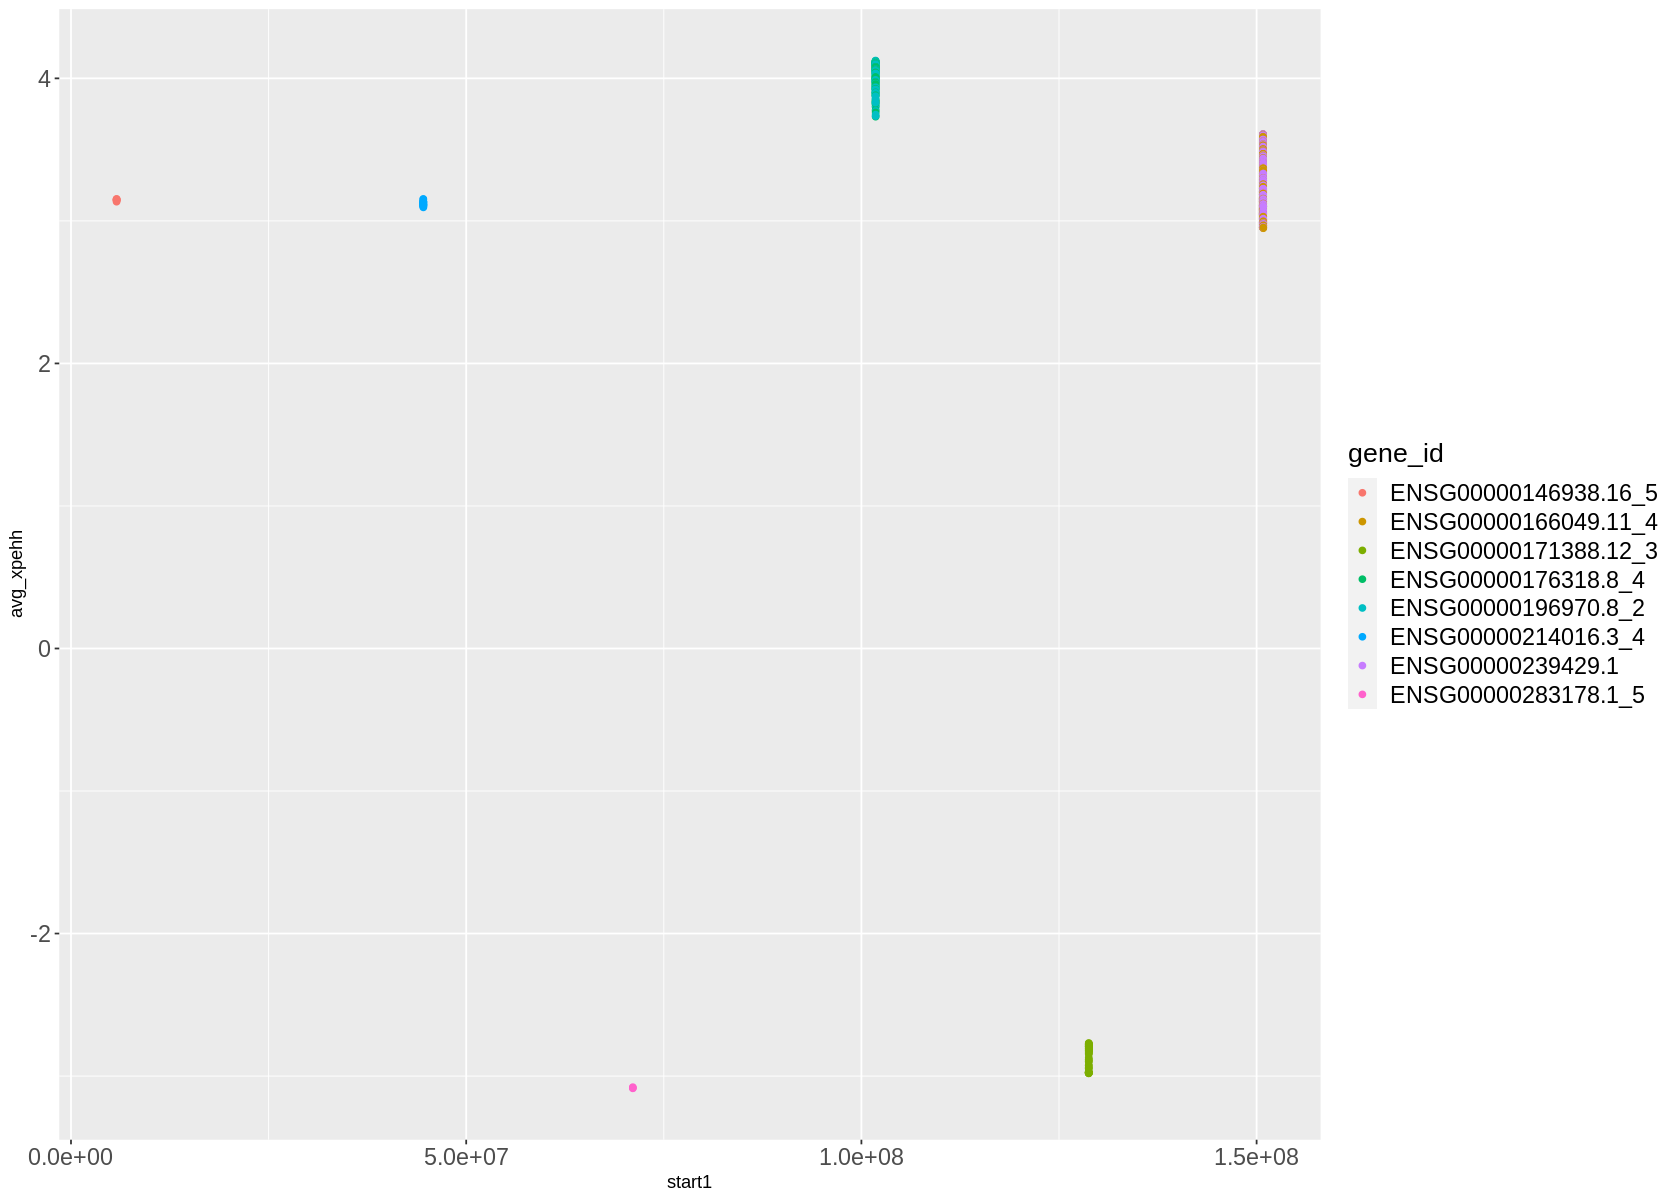

In [19]:
# Based on the number of significant xpehh values in window

options(repr.plot.width=14, repr.plot.height=10)

prop_signif_xpehh_EA_WE_high_500_genes <- read.table("prop_signif_xpehh_EA_WE_high_500_genes.bed", header = FALSE, sep = '\t')
colnames(prop_signif_xpehh_EA_WE_high_500_genes)  <- c("chr1", "start1", "end1", "prop_signif", "avg_xpehh", "chr2", "start2", "end2", "gene_id", "overlap")

print(nrow(prop_signif_xpehh_EA_WE_high_500_genes %>% filter(overlap == 0)))

prop_signif_xpehh_EA_WE_high_500_genes  <- prop_signif_xpehh_EA_WE_high_500_genes %>% filter(overlap != 0)  %>% 
    distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)

ggplot() + geom_jitter(data = prop_signif_xpehh_EA_WE_high_500_genes, aes(x = start1, y = avg_xpehh, color = gene_id), width = 0.001, height = 0.01) +
    theme(
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14), 
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14)
        )

gene_names_EA_WE_n_signif_xpehh  <- (unique(prop_signif_xpehh_EA_WE_high_500_genes[c("gene_id")]))
write_delim(gene_names_EA_WE_n_signif_xpehh, "gene_names_EA_WE_n_signif_xpehh.csv", delim = "\t", col_names = TRUE)

In [19]:
# comparing overlap between genes
intersect(gene_names_EA_WE_mean_xpehh, gene_names_EA_WE_n_signif_xpehh)

gene_id
<chr>
ENSG00000176318.8_4
ENSG00000196970.8_2
ENSG00000239429.1
ENSG00000166049.11_4


## Get genomic coordinates and genes

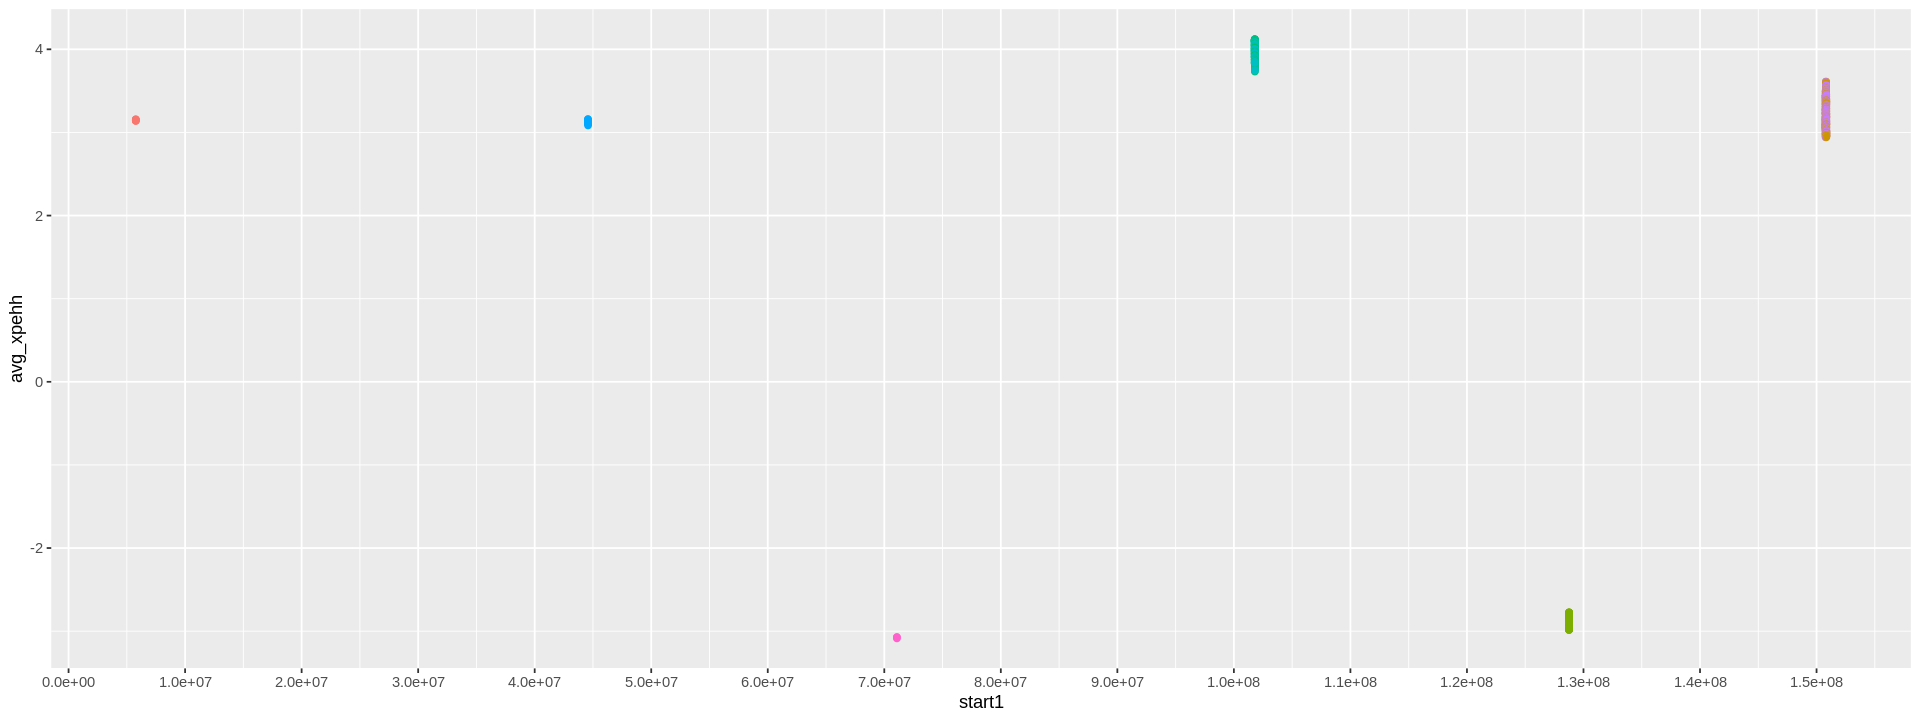

In [36]:
options(repr.plot.width=16, repr.plot.height=6)
ggplot() + 
    geom_jitter(data = prop_signif_xpehh_EA_WE_high_500_genes, aes(x = start1, y = avg_xpehh, color = gene_id), width = 0.001, height = 0.01, show.legend = FALSE) +
    scale_x_continuous(breaks = seq(0, 1.5e+08, 1e+07))

In [37]:
subset  <- prop_signif_xpehh_EA_WE_high_500_genes  %>% filter(between(start1, 0, 2e+07))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_xpehh_EA_WE_high_500_genes  %>% filter(between(start1, 2e+07, 6e+07))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_xpehh_EA_WE_high_500_genes  %>% filter(between(start1, 6e+07, 8e+07))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_xpehh_EA_WE_high_500_genes  %>% filter(between(start1, 8e+07, 1.1e+08))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_xpehh_EA_WE_high_500_genes  %>% filter(between(start1, 1.1e+08, 1.4e+08))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_xpehh_EA_WE_high_500_genes  %>% filter(between(start1, 1.4e+08, 1.6e+08))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

[1] 5768019 5794503


,gene_id
,<chr>
1,ENSG00000146938.16_5


[1] 44571760 44609162


,gene_id
,<chr>
1,ENSG00000214016.3_4


[1] 71080511 71100311


,gene_id
,<chr>
1,ENSG00000283178.1_5


[1] 101781083 101827978


,gene_id
,<chr>
1,ENSG00000176318.8_4
2,ENSG00000196970.8_2


[1] 128758638 128792601


,gene_id
,<chr>
1,ENSG00000171388.12_3


[1] 150775032 150854538


,gene_id
,<chr>
1,ENSG00000239429.1
2,ENSG00000166049.11_4


## Summarising plot for the report

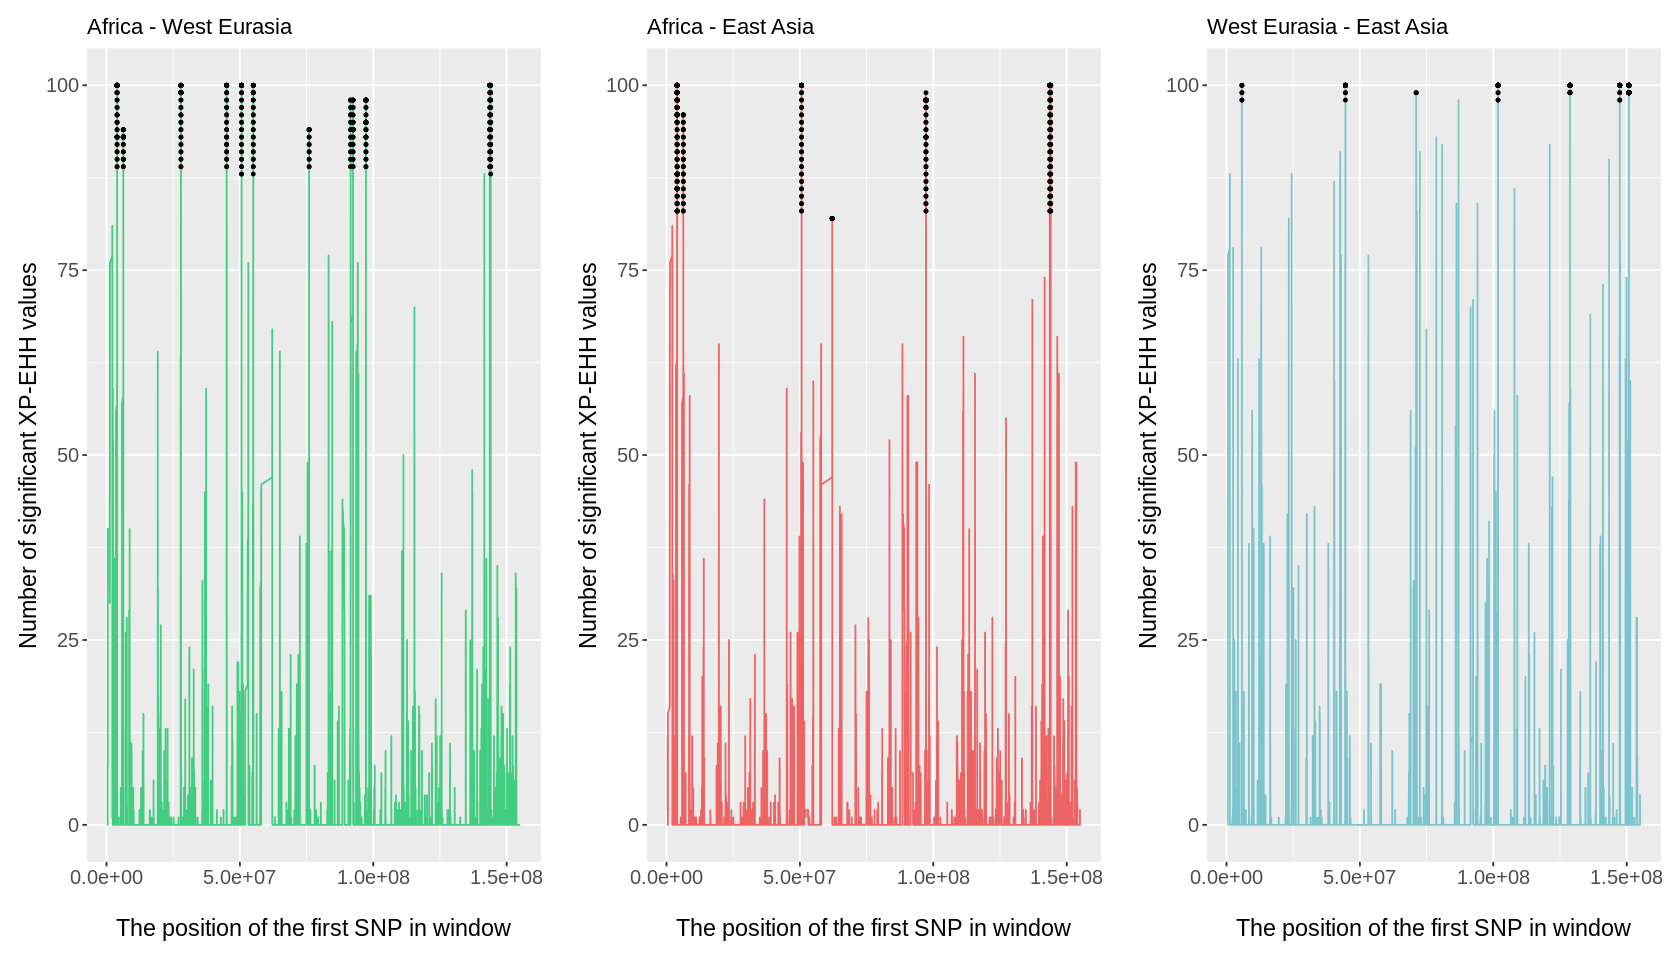

In [23]:
options(repr.plot.width=14, repr.plot.height=8)

WE_AF_plot  <- ggplot() + 
    geom_line(data = windows_xpehh_WE_AF, aes(x = first_snp_pos, y = prop_signif), color = "seagreen3", show.legend = F) + 
    geom_point(data = prop_signif_xpehh_WE_AF_high, aes(x = first_snp_pos, y = prop_signif), size = 0.7) + 
    ggtitle("Africa - West Eurasia") + xlab("\nThe position of the first SNP in window") + ylab("Number of significant XP-EHH values") + 
    theme(
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 12), 
        axis.title=element_text(size=14)
        )

EA_AF_plot  <- ggplot() + 
    geom_line(data = windows_xpehh_EA_AF, aes(x = first_snp_pos, y = prop_signif), color = "indianred2", show.legend = F) + 
    geom_point(data = prop_signif_xpehh_EA_AF_high, aes(x = first_snp_pos, y = prop_signif), size = 0.7) + 
    ggtitle("Africa - East Asia")  + xlab("\nThe position of the first SNP in window") + ylab("Number of significant XP-EHH values") + 
    theme(
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 12), 
        axis.title=element_text(size=14)
        )

EA_WE_plot  <- ggplot() + 
    geom_line(data = windows_xpehh_EA_WE, aes(x = first_snp_pos, y = prop_signif), color = "cadetblue3", show.legend = F) + 
    geom_point(data = prop_signif_xpehh_EA_WE_high , aes(x = first_snp_pos, y = prop_signif), size = 0.7) + 
    ggtitle("West Eurasia - East Asia") + xlab("\nThe position of the first SNP in window") + ylab("Number of significant XP-EHH values") + 
    theme(
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 12), 
        axis.title=element_text(size=14)
        )

mm <- theme(plot.margin=unit(rep(0.8,4), "line"))
gridExtra::grid.arrange(WE_AF_plot+mm, EA_AF_plot +mm, EA_WE_plot +mm,ncol=3)